In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Read the datasets into pandas dataframes
icu_df = pd.read_csv(os.path.join(os.getcwd(), "icu.csv"))
vax_df = pd.read_csv(os.path.join(os.getcwd(), "vax_malaysia.csv"))
cases_df = pd.read_csv(os.path.join(os.getcwd(), "cases_malaysia.csv"))

icu_df = icu_df.drop('state',axis=1)
icu_df = icu_df.groupby('date').sum()

# Merge the dataframes on the "date" column
merge1 = pd.merge(cases_df, icu_df, on="date",how="outer")
covid_df = pd.merge(merge1, vax_df, on="date",how="outer")


print(covid_df)

            date  cases_new  cases_import  cases_recovered  cases_active  \
0     2020-01-25        4.0           4.0              0.0           4.0   
1     2020-01-26        0.0           0.0              0.0           4.0   
2     2020-01-27        0.0           0.0              0.0           4.0   
3     2020-01-28        0.0           0.0              0.0           4.0   
4     2020-01-29        3.0           3.0              0.0           7.0   
...          ...        ...           ...              ...           ...   
1193  2023-05-02        NaN           NaN              NaN           NaN   
1194  2023-05-03        NaN           NaN              NaN           NaN   
1195  2023-05-04        NaN           NaN              NaN           NaN   
1196  2023-05-05        NaN           NaN              NaN           NaN   
1197  2023-05-06        NaN           NaN              NaN           NaN   

      cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
0        

In [3]:
pd.set_option('display.max_rows',100)
print(covid_df.columns)
missing = covid_df.isna().sum()
print(missing)

Index(['date', 'cases_new', 'cases_import', 'cases_recovered', 'cases_active',
       'cases_cluster', 'cases_unvax', 'cases_pvax', 'cases_fvax',
       'cases_boost', 'cases_child', 'cases_adolescent', 'cases_adult',
       'cases_elderly', 'cases_0_4', 'cases_5_11', 'cases_12_17',
       'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59',
       'cases_60_69', 'cases_70_79', 'cases_80', 'cluster_import',
       'cluster_religious', 'cluster_community', 'cluster_highRisk',
       'cluster_education', 'cluster_detentionCentre', 'cluster_workplace',
       'beds_icu', 'beds_icu_rep', 'beds_icu_total', 'beds_icu_covid', 'vent',
       'vent_port', 'icu_covid', 'icu_pui', 'icu_noncovid', 'vent_covid',
       'vent_pui', 'vent_noncovid', 'vent_used', 'vent_port_used',
       'daily_partial', 'daily_full', 'daily_booster', 'daily_booster2',
       'daily', 'daily_partial_adol', 'daily_full_adol', 'daily_booster_adol',
       'daily_booster2_adol', 'daily_partial_child', 'daily_full_

In [4]:
covid_df.dropna(inplace=True)
print(covid_df)

            date  cases_new  cases_import  cases_recovered  cases_active  \
396   2021-02-24     3545.0           1.0           3331.0       30673.0   
397   2021-02-25     1924.0           6.0           3752.0       28832.0   
398   2021-02-26     2253.0           7.0           3085.0       27990.0   
399   2021-02-27     2364.0           1.0           3320.0       27024.0   
400   2021-02-28     2437.0           1.0           3251.0       26201.0   
...          ...        ...           ...              ...           ...   
1186  2023-04-25      561.0           3.0            782.0       13575.0   
1187  2023-04-26      617.0           2.0            809.0       13383.0   
1188  2023-04-27      832.0           4.0            762.0       13449.0   
1189  2023-04-28     1067.0           0.0            673.0       13841.0   
1190  2023-04-29     1050.0           1.0            600.0       14291.0   

      cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
396      

#df2 is a copy of original combined dataset covid_df which is used to identify the cumulative frequency of each month in a year

In [5]:
# Convert the date column to datetime format
df2 = covid_df.copy()
df2['date'] = pd.to_datetime(df2['date'])

# Create a new column with the month for each date
df2['month'] = df2['date'].dt.strftime('%Y-%m')

#Find the data of march and print the result
mar_2021_df = df2[df2['month'] == '2021-02']
print(mar_2021_df['cumul_full'])


396     3.0
397     5.0
398     8.0
399    14.0
400    20.0
Name: cumul_full, dtype: float64


# Occupancy of ICU Beds for COVID-19 Patients vs Fully vaccinated culmulative frequency over Time (2022)

In [6]:
# Filter the data for the year 2022
df_2022 = df2.loc[(df2['date'].dt.year == 2022) & (df2['date'].dt.month.between(1, 12))]

# Print the resulting DataFrame
#print(df_2022)

# Convert the date column to datetime format
df_2022['date'] = pd.to_datetime(df_2022['date'])

# Create a new column with the month for each date
df_2022['month'] = df_2022['date'].dt.strftime('%Y-%m')

# Group the data by month and sum the values for each month
monthly_sum_2022 = df_2022.groupby('month').sum()

# Print the resulting dataframe
print(monthly_sum_2022['beds_icu_covid'])

month
2022-01    28206.0
2022-02    23637.0
2022-03    27307.0
2022-04    24456.0
2022-05    19209.0
2022-06    13323.0
2022-07    12605.0
2022-08    11585.0
2022-09    11050.0
2022-10    11294.0
2022-11    10765.0
2022-12    11248.0
Name: beds_icu_covid, dtype: float64


/var/folders/sx/c4mlfcxs39j7xb2twn401n8h0000gn/T/ipykernel_14764/468227126.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['date'] = pd.to_datetime(df_2022['date'])
/var/folders/sx/c4mlfcxs39j7xb2twn401n8h0000gn/T/ipykernel_14764/468227126.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['month'] = df_2022['date'].dt.strftime('%Y-%m')
/var/folders/sx/c4mlfcxs39j7xb2twn401n8h0000gn/T/ipykernel_14764/468227126.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.

In [7]:
df5 = covid_df.copy()
df5['date'] = pd.to_datetime(covid_df['date'])
df5['year'] = df5['date'].dt.year
df5['month'] = df5['date'].dt.month

df_grouped = df5.groupby(['year','month'])['cumul_full'].agg('last').reset_index()
print(df_grouped.columns)

# Filter the data for the year 2022
df_2022 = df_grouped.loc[df_grouped['year'] == 2022].reset_index(drop=True)

# Print the resulting DataFrame
print(df_2022)

Index(['year', 'month', 'cumul_full'], dtype='object')
    year  month  cumul_full
0   2022      1  25747631.0
1   2022      2  25786066.0
2   2022      3  25840007.0
3   2022      4  26767036.0
4   2022      5  27115288.0
5   2022      6  27306895.0
6   2022      7  27471268.0
7   2022      8  27508481.0
8   2022      9  27521121.0
9   2022     10  27528536.0
10  2022     11  27533137.0
11  2022     12  27537575.0


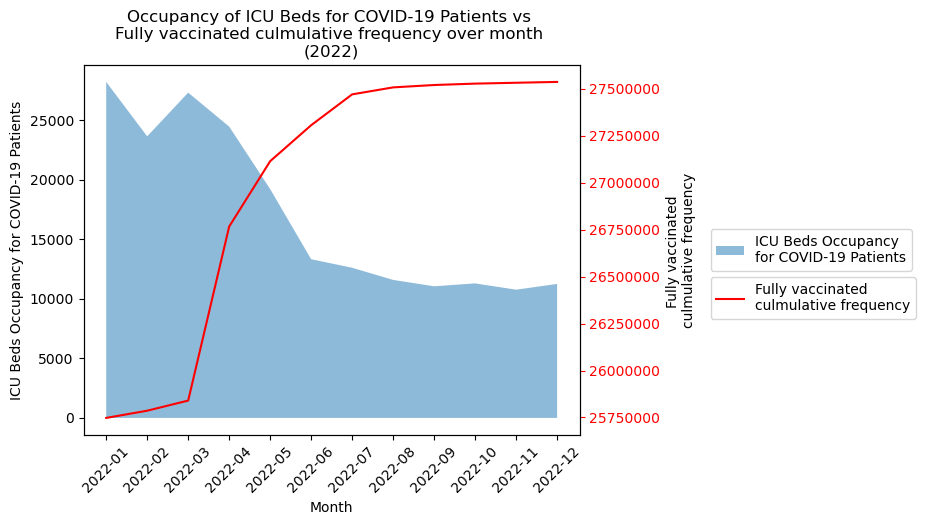

In [8]:
# Plot the data for ICU beds occupancy
fig, ax1 = plt.subplots()
ax1.fill_between(monthly_sum_2022.index, monthly_sum_2022['beds_icu_covid'], alpha=0.5, label='ICU Beds Occupancy \nfor COVID-19 Patients')
ax1.set_xlabel('Month')
ax1.set_ylabel('ICU Beds Occupancy for COVID-19 Patients')
ax1.set_title('Occupancy of ICU Beds for COVID-19 Patients vs \nFully vaccinated culmulative frequency over month \n(2022)')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Create a twin axis for vaccination rate
ax2 = ax1.twinx()
ax2.tick_params(axis='y', labelcolor='r', colors='r')
ax2.ticklabel_format(style='plain', axis='y')

# Plot the data for vaccination rate
ax2.plot(df_2022.index, df_2022['cumul_full'], color='r', label='Fully vaccinated \nculmulative frequency')
ax2.set_ylabel('Fully vaccinated \nculmulative frequency',)

# Add a legend for both axes
ax1.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1.25, 0.37))

# Show the plot
plt.show()

# Occupancy of ICU Beds for COVID-19 Patients vs Fully vaccinated culmulative frequency over Time (2021)

In [9]:
# Filter the data for the year 2021
df_2021 = df2.loc[(df2['date'].dt.year == 2021) & (df2['date'].dt.month.between(1, 12))]

# Print the resulting DataFrame
print(df_2021)

# Convert the date column to datetime format
df_2021['date'] = pd.to_datetime(df_2021['date'])

# Create a new column with the month for each date
df_2021['month'] = df_2021['date'].dt.strftime('%Y-%m')

# Group the data by month and sum the values for each month
monthly_sum_2021 = df_2021.groupby('month').sum()

# Print the resulting dataframe
print(monthly_sum_2021['cumul_full'])

          date  cases_new  cases_import  cases_recovered  cases_active  \
396 2021-02-24     3545.0           1.0           3331.0       30673.0   
397 2021-02-25     1924.0           6.0           3752.0       28832.0   
398 2021-02-26     2253.0           7.0           3085.0       27990.0   
399 2021-02-27     2364.0           1.0           3320.0       27024.0   
400 2021-02-28     2437.0           1.0           3251.0       26201.0   
..         ...        ...           ...              ...           ...   
702 2021-12-27     2757.0         147.0           4620.0       42917.0   
703 2021-12-28     2897.0         192.0           3434.0       42357.0   
704 2021-12-29     3683.0         239.0           4322.0       41682.0   
705 2021-12-30     3997.0         366.0           3984.0       41661.0   
706 2021-12-31     3573.0         343.0           3988.0       41221.0   

     cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
396         2483.0       3545.0   

/var/folders/sx/c4mlfcxs39j7xb2twn401n8h0000gn/T/ipykernel_14764/283709592.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['date'] = pd.to_datetime(df_2021['date'])
/var/folders/sx/c4mlfcxs39j7xb2twn401n8h0000gn/T/ipykernel_14764/283709592.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['month'] = df_2021['date'].dt.strftime('%Y-%m')
/var/folders/sx/c4mlfcxs39j7xb2twn401n8h0000gn/T/ipykernel_14764/283709592.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.

In [10]:
# Filter the data for the year 2021
df_2021 = df_grouped.loc[df_grouped['year'] == 2021].reset_index(drop=True)

# Print the resulting DataFrame
print(df_2021)

    year  month  cumul_full
0   2021      2        20.0
1   2021      3    219086.0
2   2021      4    561342.0
3   2021      5   1094954.0
4   2021      6   2343373.0
5   2021      7   6914329.0
6   2021      8  15341284.0
7   2021      9  20915423.0
8   2021     10  24831889.0
9   2021     11  25503163.0
10  2021     12  25666548.0


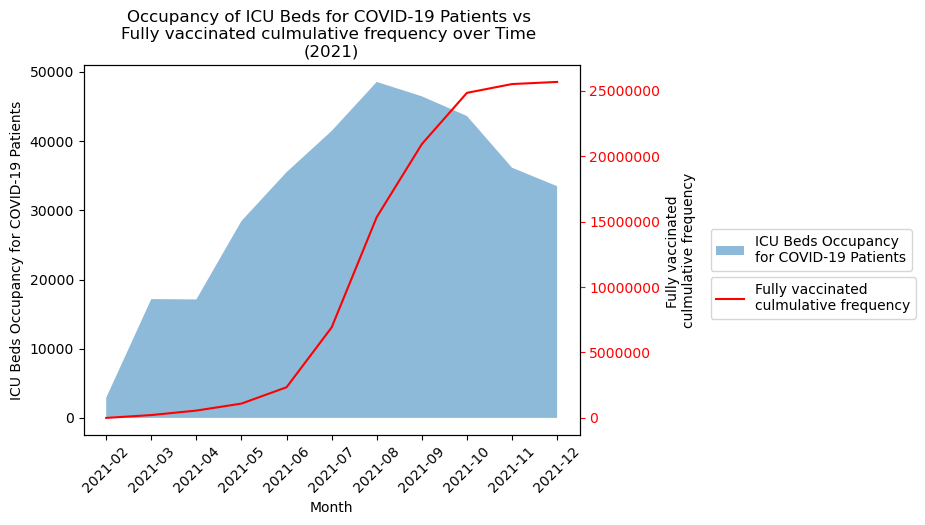

In [11]:
# Plot the data for ICU beds occupancy
fig, ax1 = plt.subplots()
ax1.fill_between(monthly_sum_2021.index, monthly_sum_2021['beds_icu_covid'], alpha=0.5, label='ICU Beds Occupancy \nfor COVID-19 Patients')
ax1.set_xlabel('Month')
ax1.set_ylabel('ICU Beds Occupancy for COVID-19 Patients')
ax1.set_title('Occupancy of ICU Beds for COVID-19 Patients vs \nFully vaccinated culmulative frequency over Time \n(2021)')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Create a twin axis for vaccination rate
ax2 = ax1.twinx()
ax2.ticklabel_format(style='plain', axis='y')
ax2.tick_params(axis='y', labelcolor='r', colors='r')

# Plot the data for vaccination rate
ax2.plot(df_2021.index, df_2021['cumul_full'], color='r', label='Fully vaccinated \nculmulative frequency')
ax2.set_ylabel('Fully vaccinated \nculmulative frequency')

# Add a legend for both axes
ax1.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1.25, 0.37))

# Show the plot
plt.show()

In [12]:
# Filter the data for the year 2022
df_2023 = df2.loc[(df2['date'].dt.year == 2023) & (df2['date'].dt.month.between(1, 12))]

# Print the resulting DataFrame
#print(df_2022)

# Convert the date column to datetime format
df_2023['date'] = pd.to_datetime(df_2023['date'])

# Create a new column with the month for each date
df_2023['month'] = df_2023['date'].dt.strftime('%Y-%m')

# Group the data by month and sum the values for each month
monthly_sum_2023 = df_2023.groupby('month').sum()

# Print the resulting dataframe
print(monthly_sum_2023['cumul_full'])

# Filter the data for the year 2022
df_2023 = df_grouped.loc[df_grouped['year'] == 2023].reset_index(drop=True)

# Print the resulting DataFrame
print(df_2023)

month
2023-01    633415578.0
2023-02    550860289.0
2023-03    633552188.0
2023-04    578499267.0
Name: cumul_full, dtype: float64
   year  month  cumul_full
0  2023      1  27541179.0
1  2023      2  27544086.0
2  2023      3  27546649.0
3  2023      4  27548216.0


/var/folders/sx/c4mlfcxs39j7xb2twn401n8h0000gn/T/ipykernel_14764/3171222431.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['date'] = pd.to_datetime(df_2023['date'])
/var/folders/sx/c4mlfcxs39j7xb2twn401n8h0000gn/T/ipykernel_14764/3171222431.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['month'] = df_2023['date'].dt.strftime('%Y-%m')
/var/folders/sx/c4mlfcxs39j7xb2twn401n8h0000gn/T/ipykernel_14764/3171222431.py:14: FutureWarning: The default value of numeric_only in DataFrameGroup

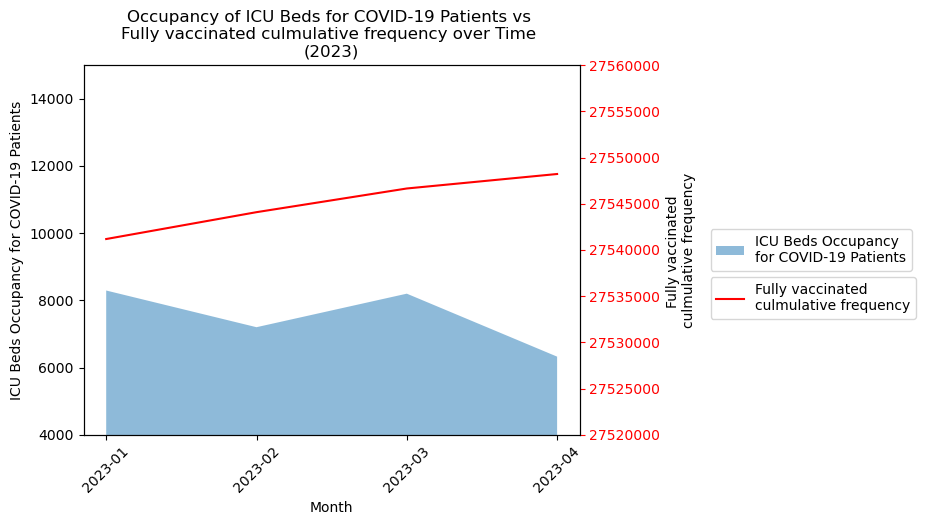

In [13]:
# Plot the data for ICU beds occupancy
fig, ax1 = plt.subplots()
ax1.fill_between(monthly_sum_2023.index, monthly_sum_2023['beds_icu_covid'], alpha=0.5, label='ICU Beds Occupancy \nfor COVID-19 Patients')
ax1.set_xlabel('Month')
ax1.set_ylabel('ICU Beds Occupancy for COVID-19 Patients')
ax1.set_title('Occupancy of ICU Beds for COVID-19 Patients vs \nFully vaccinated culmulative frequency over Time \n(2023)')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Create a twin axis for vaccination rate
ax2 = ax1.twinx()
ax2.ticklabel_format(style='plain', axis='y', useOffset=False)
# Set axis color to green
ax2.tick_params(axis='y', labelcolor='r', colors='r')
ax1.set_ylim(4000, 15000)
ax2.set_ylim(27520000, 27560000)

# Plot the data for vaccination rate
ax2.plot(df_2023.index, df_2023['cumul_full'], color='r', label='Fully vaccinated \nculmulative frequency')
ax2.set_ylabel('Fully vaccinated \nculmulative frequency')

# Add a legend for both axes
ax1.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1.25, 0.37))

# Show the plot
plt.show()

In [14]:
# Filter the data for the years 2021 to 2023
df_2021_2023 = df2.loc[(df2['date'].dt.year.between(2021, 2023))]

# Convert the date column to datetime format
df_2021_2023['date'] = pd.to_datetime(df_2021_2023['date'])

# Create a new column with the year for each date
df_2021_2023['year'] = df_2021_2023['date'].dt.strftime('%Y')

# Group the data by year and month, and sum the values for each month and year
yearly_sum = df_2021_2023.groupby(['year']).sum()

# Print the resulting dataframe for a specific column, e.g. 'cumul_full'
print(yearly_sum["cumul_full"])

# Filter the data for the year 2022
#df_2021_2023 = df_grouped_by_year.loc[df_grouped_by_year['year']].reset_index(drop=True)

# Print the resulting DataFrame
#print(df_2021_2023)


year
2021    3.388631e+09
2022    9.818313e+09
2023    2.396327e+09
Name: cumul_full, dtype: float64


/var/folders/sx/c4mlfcxs39j7xb2twn401n8h0000gn/T/ipykernel_14764/2960172272.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_sum = df_2021_2023.groupby(['year']).sum()


In [15]:
df5 = covid_df.copy()
df5['date'] = pd.to_datetime(covid_df['date'])
df5['year'] = df5['date'].dt.year
df5['month'] = df5['date'].dt.month

df_grouped_by_year = df5.groupby(['year'])['cumul_full'].agg('last').reset_index()
df_grouped_by_year

,year,cumul_full
0,2021,25666548.0
1,2022,27537575.0
2,2023,27548216.0


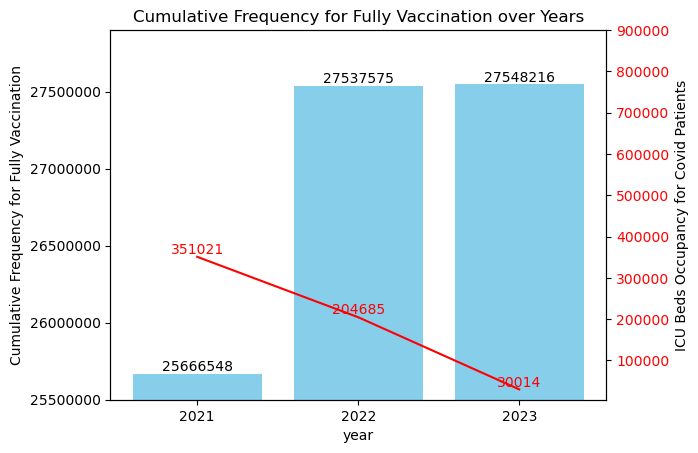

In [16]:
# Plot bar graph for cumul_full
plt.bar(df_grouped_by_year.index, df_grouped_by_year['cumul_full'], color='skyblue')
plt.xlabel('year')
plt.ylabel('Cumulative Frequency for Fully Vaccination')
plt.title('Cumulative Frequency for Fully Vaccination over Years')

for i, val in enumerate(df_grouped_by_year['cumul_full']):
    plt.text(i, val+5, int(val), color='k', ha='center', va='bottom')

plt.ticklabel_format(style='plain', axis='y')
plt.ylim(25500000, 27900000)

# Create twin y-axis for beds_icu_covid
ax2 = plt.twinx()
ax2.set_ylim(5000, 900000)

# Show the frequency on the ax2 graph
for i, val in enumerate(yearly_sum['beds_icu_covid']):
    ax2.text(i, val+5, int(val), color='r', ha='center', va='bottom')

# Plot line graph for beds_icu_covid
ax2.plot(yearly_sum.index, yearly_sum['beds_icu_covid'], color='r')
ax2.set_ylabel('ICU Beds Occupancy for Covid Patients')
ax2.tick_params(axis='y', labelcolor='r')

# Set x-axis tick labels to show only the month
plt.xticks(yearly_sum.index, rotation=45)

# Show the plot
plt.show()

<Axes: >

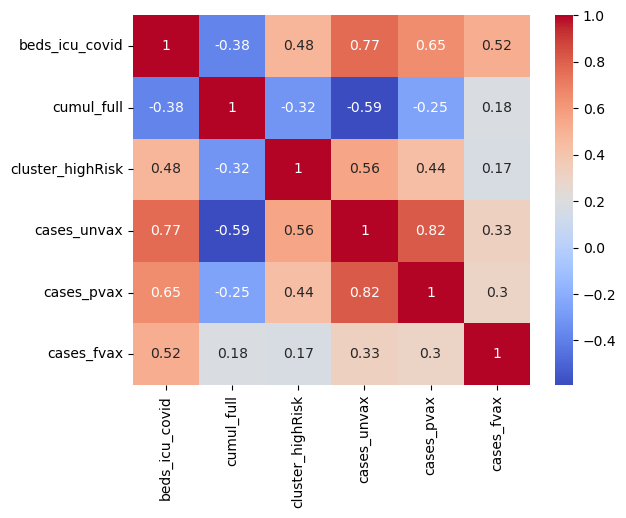

In [17]:
import seaborn as sns

# Create a correlation matrix for relevant variables
corr_matrix = covid_df[['beds_icu_covid', 'cumul_full', 'cluster_highRisk', 'cases_unvax', 'cases_pvax', 'cases_fvax']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


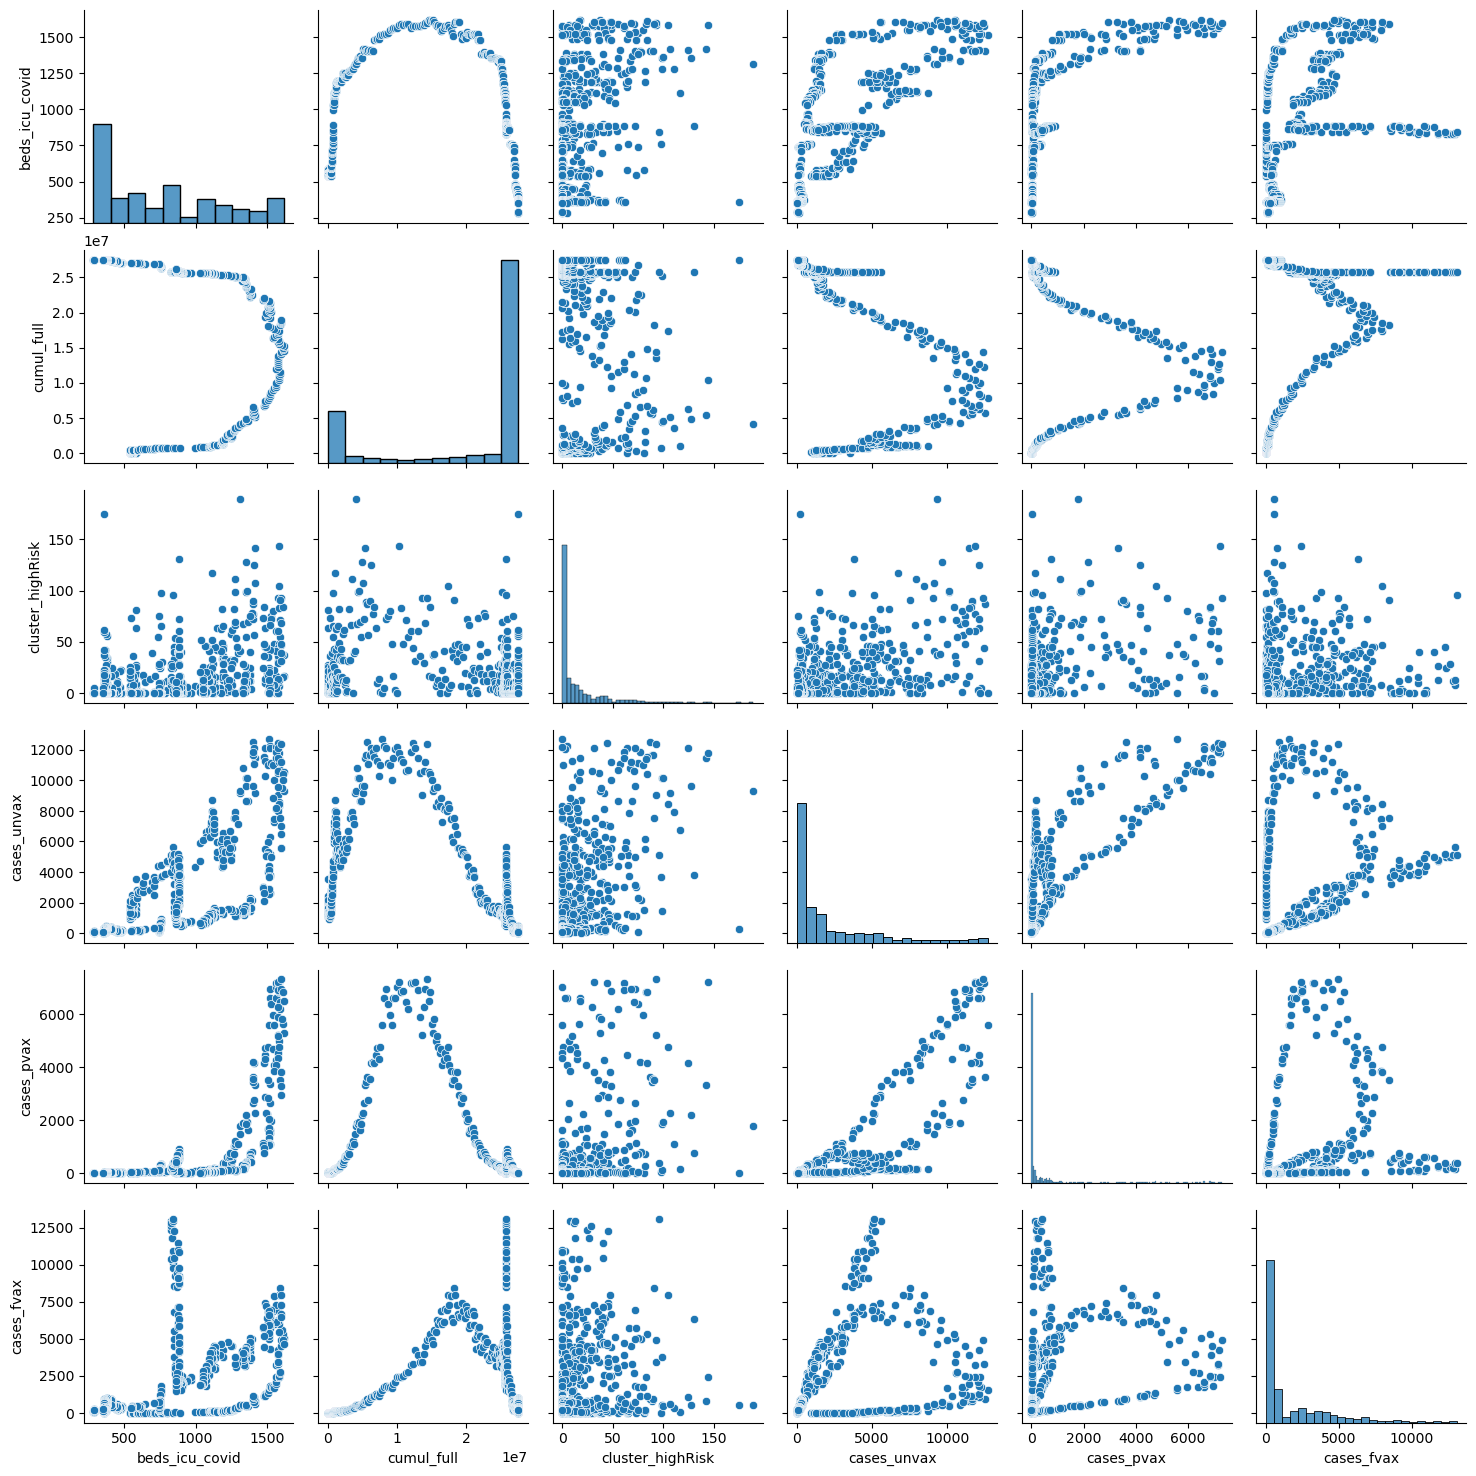

In [18]:
# Create a pairplot of relevant variables
sns.pairplot(covid_df[['beds_icu_covid', 'cumul_full', 'cluster_highRisk', 'cases_unvax', 'cases_pvax', 'cases_fvax']])
plt.show()

In [19]:
covid_df.describe()

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,...,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,6252.796855,47.617300,6228.642202,73421.010485,520.148100,2262.939712,571.197903,1792.774574,1625.884666,805.660550,...,21.000000,12.920052,0.152031,285.990826,10.643512,0.339450,14.339450,9.503277,3.623853,0.807339
std,7216.386669,110.730527,7129.604233,79849.438050,793.058856,3093.024892,1446.572276,2615.866315,3186.410824,1013.131196,...,56.952206,35.290994,0.520403,953.571764,43.279095,2.086415,49.356078,28.414506,16.080630,7.122907
min,101.000000,0.000000,0.000000,8961.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1682.500000,3.000000,1773.000000,23110.500000,4.000000,179.000000,10.000000,121.000000,0.000000,127.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3304.000000,7.000000,3331.000000,40102.000000,111.000000,803.000000,25.000000,481.000000,296.000000,325.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6836.500000,20.000000,6789.000000,79686.500000,679.000000,3214.500000,262.500000,2669.500000,1632.500000,1000.000000,...,3.000000,3.000000,0.000000,93.000000,1.000000,0.000000,3.000000,4.000000,1.000000,0.000000
max,33406.000000,719.000000,33872.000000,323785.000000,3394.000000,12682.000000,7316.000000,13061.000000,18165.000000,4389.000000,...,388.000000,255.000000,6.000000,7745.000000,521.000000,39.000000,504.000000,379.000000,194.000000,134.000000


In [20]:
df5[['beds_icu_covid', 'cumul_full', 'cluster_highRisk', 'cases_unvax', 'cases_pvax', 'cases_fvax']].describe().applymap(lambda x: format(x, '.2f'))


,beds_icu_covid,cumul_full,cluster_highRisk,cases_unvax,cases_pvax,cases_fvax
count,763.00,763.00,763.00,763.00,763.00,763.00
mean,767.65,20449897.48,15.57,2262.94,571.20,1792.77
std,412.91,10389676.39,25.76,3093.02,1446.57,2615.87
min,282.00,3.00,0.00,10.00,0.00,0.00
25%,367.00,15880176.00,0.00,179.00,10.00,121.00
50%,634.00,25806602.00,3.00,803.00,25.00,481.00
75%,1115.00,27516314.00,19.00,3214.50,262.50,2669.50
max,1620.00,27548216.00,189.00,12682.00,7316.00,13061.00


Text(0, 0.5, 'Fully vaccinated culmulative frequency')

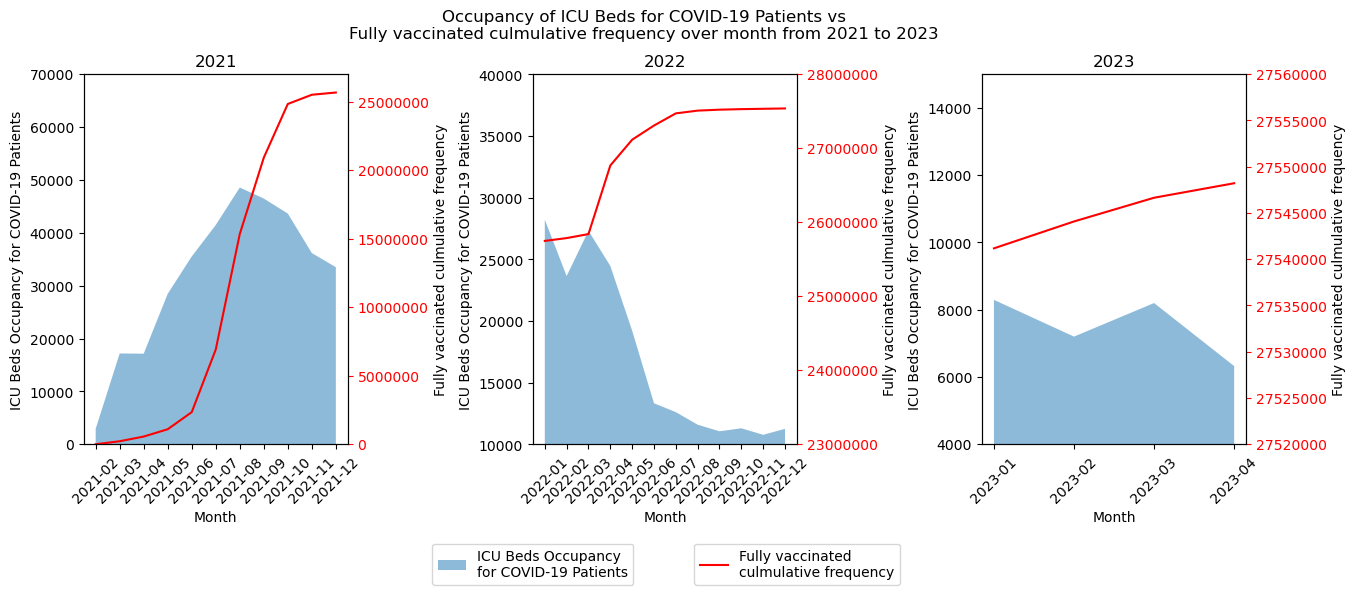

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.suptitle('Occupancy of ICU Beds for COVID-19 Patients vs \nFully vaccinated culmulative frequency over month from 2021 to 2023 ')
# Set the spacing between subplots and figure edges
plt.subplots_adjust(top=0.9, hspace=0.5, wspace=0.5)

# Add space after the suptitle
plt.subplots_adjust(top=0.85)

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.7)

# First subplot
axs[0].fill_between(monthly_sum_2021.index, monthly_sum_2021['beds_icu_covid'], alpha=0.5, label='ICU Beds Occupancy \nfor COVID-19 Patients')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('ICU Beds Occupancy for COVID-19 Patients')
axs[0].set_title('2021')

# Rotate the x-axis labels by 45 degrees
axs[0].tick_params(axis='x', rotation=45)

# Create a twin axis for vaccination rate
ax2 = axs[0].twinx()
ax2.tick_params(axis='y', labelcolor='r', colors='r')
ax2.ticklabel_format(style='plain', axis='y')

# Plot the data for vaccination rate
ax2.plot(df_2021.index, df_2021['cumul_full'], color='r', label='Fully vaccinated culmulative frequency')
ax2.set_ylabel('Fully vaccinated culmulative frequency',)

axs[0].set_ylim(0, 70000)
ax2.set_ylim(0, 27000000)

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Second subplot
axs[1].fill_between(monthly_sum_2022.index, monthly_sum_2022['beds_icu_covid'], alpha=0.5, label='ICU Beds Occupancy \nfor COVID-19 Patients')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('ICU Beds Occupancy for COVID-19 Patients')
axs[1].set_title('2022')

# Rotate the x-axis labels by 45 degrees
axs[1].tick_params(axis='x', rotation=45)

# Create a twin axis for vaccination rate
ax2 = axs[1].twinx()
ax2.ticklabel_format(style='plain', axis='y')
ax2.tick_params(axis='y', labelcolor='r', colors='r')

# Plot the data for vaccination rate
ax2.plot(df_2022.index, df_2022['cumul_full'], color='r', label='Fully vaccinated \nculmulative frequency')
ax2.set_ylabel('Fully vaccinated culmulative frequency')

# Add a legend for both axes
axs[1].legend(loc='upper center', bbox_to_anchor=(0, -0.25))
ax2.legend(loc='upper center', bbox_to_anchor=(1, -0.25))

axs[1].set_ylim(10000, 40000)
ax2.set_ylim(23000000, 28000000)

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Third subplot
axs[2].fill_between(monthly_sum_2023.index, monthly_sum_2023['beds_icu_covid'], alpha=0.5, label='ICU Beds Occupancy \nfor COVID-19 Patients')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('ICU Beds Occupancy for COVID-19 Patients')
axs[2].set_title('2023')

# Rotate the x-axis labels by 45 degrees
axs[2].tick_params(axis='x', rotation=45)

# Create a twin axis for vaccination rate
ax2 = axs[2].twinx()
ax2.ticklabel_format(style='plain', axis='y', useOffset=False)
ax2.tick_params(axis='y', labelcolor='r', colors='r')
axs[2].set_ylim(4000, 15000)
ax2.set_ylim(27520000, 27560000)

# Plot the data for vaccination rate
ax2.plot(df_2023.index, df_2023['cumul_full'], color='r', label='Fully vaccinated \nculmulative frequency')
ax2.set_ylabel('Fully vaccinated culmulative frequency')


# Some python variables description

icu_df	= icu.csv
vax_df	= vaccination.csv
cases_df	= cases.csv
covid_df	= dataset that combined 3 different datasets with removing 'state' variable

df2	= a copy of covid_df to identify the cumulative frequency of beds_icu_covid for graph plotting

df_2022, df_2021, df_2020 = beds_icu_covid and cumul_full for the particular year

df5	= a copy of covid_df to identify the last value of each month for the 'cumul_full' to obtain the cumulative frequency of number of full vaccination in the particular month

In [22]:
df5.head(10)

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4,year,month
396,2021-02-24,3545.0,1.0,3331.0,30673.0,2483.0,3545.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2021,2
397,2021-02-25,1924.0,6.0,3752.0,28832.0,705.0,1924.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2021,2
398,2021-02-26,2253.0,7.0,3085.0,27990.0,1136.0,2253.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,2021,2
399,2021-02-27,2364.0,1.0,3320.0,27024.0,1100.0,2364.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,2021,2
400,2021-02-28,2437.0,1.0,3251.0,26201.0,1404.0,2437.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2021,2
401,2021-03-01,1828.0,7.0,2486.0,25538.0,962.0,1828.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2021,3
402,2021-03-02,1555.0,3.0,2528.0,24559.0,604.0,1555.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,3
403,2021-03-03,1745.0,2.0,2276.0,24021.0,867.0,1744.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2021,3
404,2021-03-04,2063.0,9.0,2922.0,23157.0,897.0,2062.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,2021,3
405,2021-03-05,2154.0,5.0,3275.0,22030.0,1021.0,2151.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2021,3


In [128]:
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

import numpy as np

In [24]:
columns_of_interests = [
    'cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost', 'cumul_partial', 'cumul_full',
    'cumul_booster', 'cumul_booster2', 'cumul_partial_adol', 'cumul_full_adol', 'cumul_booster_adol', 
    'cumul_booster2_adol', 'cumul_partial_child', 'cumul_full_child', 'cumul_booster_child', 'cumul_booster2_child',
    'pfizer1', 'pfizer2', 'pfizer3', 'pfizer4', 'sinovac1', 'sinovac2', 'sinovac3', 'sinovac4', 'astra1', 'astra2',
    'astra3', 'astra4', 'sinopharm1', 'sinopharm2', 'sinopharm3', 'sinopharm4', 'cansino', 'cansino3', 'cansino4'
    ]
target_columns = ['beds_icu_covid']

In [25]:
df_modeling_X = df5.copy()
df_modeling_X = df_modeling_X[target_columns + columns_of_interests]
df_modeling_Y = df_modeling_X.pop('beds_icu_covid')

In [26]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_modeling_X, df_modeling_Y, test_size=0.2, random_state=999)

In [58]:
scaler_X_train = StandardScaler().fit(X_train)
scaled_X_train = scaler_X_train.transform(X_train)
scaled_X_train = pd.DataFrame(scaled_X_train, columns = X_train.columns)

scaler_X_test = StandardScaler().fit(X_test)
scaled_X_test = scaler_X_test.transform(X_test)
scaled_X_test = pd.DataFrame(scaled_X_test, columns = X_test.columns)

In [30]:
key_coef = "Coefficient"
key_intercept = "Intercept"
key_feature_importance = "Feature Importance"
key_r2 = "R2 Score"
key_mae = "MAE"
key_mse = "MSE"
key_rmse = "RMSE"
key_mean_r2 = "Mean R2 10FoldCV"
key_mean_mae = "Mean MAE 10FoldCV"
key_mean_mse = "Mean MSE 10FoldCV"
key_mean_rmse = "Mean RMSE 10FoldCV"
key_mean_ev = "Mean Explained Variance 10FoldCV"
key_mean_max_err = "Mean Max Error 10FoldCV"
key_estimator = "estimator"
key_r2_list = "R2 List"
key_rmse_list = "RMSE List"

In [31]:
def find_scores(modelUsed, xTrainData, xTestData, isEnsemble):
    modelUsed.fit(xTrainData, y_train)

    y_pred = modelUsed.predict(xTestData)
    mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
    mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
    rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
    r2score = modelUsed.score(xTestData, y_test)
    
    results = cross_validate(estimator=modelUsed, X=xTrainData, y=y_train, cv=10, return_estimator=True,
                             scoring=['r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 
                                      'explained_variance', 'max_error', 'neg_mean_absolute_error'])
    
    output = {}
    if not isEnsemble:
        output[key_coef] = modelUsed.coef_
        output[key_intercept] = modelUsed.intercept_
    else:
        output[key_feature_importance] = modelUsed.feature_importances_
    
    output[key_r2] = r2score
    output[key_mae] = mae
    output[key_mse] = mse
    output[key_rmse] = rmse
    output[key_mean_r2] = results['test_r2'].mean()
    output[key_mean_mae] = abs(results['test_neg_mean_absolute_error']).mean()
    output[key_mean_mse] = abs(results['test_neg_mean_squared_error']).mean()
    output[key_mean_rmse] = abs(results['test_neg_root_mean_squared_error']).mean()
    output[key_mean_ev] = results['test_explained_variance'].mean()
    output[key_mean_max_err] = abs(results['test_max_error']).mean()
    output[key_estimator] = results[key_estimator]
    output[key_r2_list] = results['test_r2']
    output[key_rmse_list] = abs(results['test_neg_root_mean_squared_error'])
    return output
    
def findForRawScaledAndReduced(model, isEnsemble):
    raw_output = find_scores(model, X_train, X_test, isEnsemble)
    scaled_output = find_scores(model, scaled_X_train, scaled_X_test, isEnsemble)
    reduc_output = find_scores(model, fs_reduc_X_train, fs_reduc_X_test, isEnsemble)
    return [raw_output, scaled_output, reduc_output]

In [32]:
regr = LinearRegression()
res_regr = findForRawScaledAndReduced(regr, False)

In [33]:
clf = Lasso(alpha=0.1, tol=1e-2)
res_clf = findForRawScaledAndReduced(clf, False)

In [34]:
byr = BayesianRidge()
res_byr = findForRawScaledAndReduced(byr, False)

In [35]:
rfr = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=999)
res_rfr = findForRawScaledAndReduced(rfr, True)

In [36]:
elastic = ElasticNet(alpha=0.1, tol=1e-2)
res_elastic = findForRawScaledAndReduced(elastic, False)

In [37]:
# sgd_regr = SGDRegressor()
# res_sgd_regr = findForRawScaledAndReduced(sgd_regr, False)

In [38]:
gbr = GradientBoostingRegressor(n_estimators=500, max_depth=4, min_samples_split=5, learning_rate=0.01, loss='squared_error')
res_gbr = findForRawScaledAndReduced(gbr, True)

In [39]:
summary_columns = [key_r2, key_mae, key_mse, key_rmse, key_mean_r2, key_mean_mae, 
                   key_mean_mse, key_mean_rmse,key_mean_ev, key_mean_max_err]
model_res = [res_regr, res_clf, res_byr, res_elastic, res_rfr, res_gbr]
summary = {i:[k[j][i] for j in [0,1] for k in model_res] for i in summary_columns}

In [40]:
summary_df = pd.DataFrame.from_dict(summary)
summary_df.index = ['Linear Regression', 'Lasso', 'BayesianRidge', 'Elastic', 'Random Forests Regressor', 'Gradient Boosting Regressor',
                    'Linear Regression Scaled', 'Lasso Scaled', 'BayesianRidge Scaled', 'Elastic Scaled', 'Random Forests Regressor Scaled', 'Gradient Boosting Regressor Scaled',
                    ]
summary_df

,R2 Score,MAE,MSE,RMSE,Mean R2 10FoldCV,Mean MAE 10FoldCV,Mean MSE 10FoldCV,Mean RMSE 10FoldCV,Mean Explained Variance 10FoldCV,Mean Max Error 10FoldCV
Linear Regression,0.987987,34.364133,2299.264988,47.950652,0.986984,30.716606,2082.520485,45.006158,0.987375,169.472507
Lasso,0.977544,50.512591,4298.300138,65.561423,0.976642,45.248577,3741.468465,60.581433,0.976989,204.697214
BayesianRidge,0.988216,33.348642,2255.440649,47.491480,0.987021,30.098765,2080.642769,44.913818,0.987376,170.844645
Elastic,0.977574,50.471757,4292.420478,65.516566,0.976648,45.224475,3740.314662,60.567957,0.976995,204.713467
Random Forests Regressor,0.995115,19.297403,935.009974,30.577933,0.995758,15.604703,676.583173,25.741848,0.995867,108.362794
Gradient Boosting Regressor,0.996704,15.519429,630.879277,25.117310,0.995354,13.356945,734.435215,25.767934,0.995437,127.472687
Linear Regression Scaled,0.957773,66.788036,8082.497561,89.902712,0.986984,30.716606,2082.520485,45.006158,0.987375,169.472507
Lasso Scaled,0.958027,69.100988,8033.871268,89.631865,0.979601,41.366103,3270.327736,56.638570,0.979936,198.108330
BayesianRidge Scaled,0.959174,66.245090,7814.270203,88.398361,0.987045,30.437015,2073.693314,44.896982,0.987424,168.627047
Elastic Scaled,0.947666,76.040125,10016.999228,100.084960,0.969741,53.411474,4854.251163,69.214310,0.970487,224.607164


In [41]:
pipeline_regr = Pipeline(
    [
     ('selector', fs),
     ('model', regr)
    ]
)

search_regr = GridSearchCV(
    estimator = pipeline_regr,
    param_grid = {
        'selector__score_func': [f_regression],
        'selector__k':[i for i in range(1, len(columns_of_interests))]
    },
    n_jobs=-1,
    scoring="r2",
    cv=10,
    verbose=3,
    return_train_score=True
)

search_regr.fit(X_train, y_train)

cv_results_regr = pd.DataFrame(search_regr.cv_results_)
cv_results_regr

Fitting 10 folds for each of 34 candidates, totalling 340 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__k,param_selector__score_func,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002930,0.000975,0.000805,0.000370,1,<function f_regression at 0x135ec8160>,"{'selector__k': 1, 'selector__score_func': <fu...",0.645723,0.621440,0.716017,...,0.648264,0.643265,0.655185,0.653294,0.665920,0.655844,0.654647,0.660492,0.655048,0.005913
1,0.003761,0.001352,0.001258,0.000603,2,<function f_regression at 0x135ec8160>,"{'selector__k': 2, 'selector__score_func': <fu...",0.646251,0.636359,0.746634,...,0.664148,0.657917,0.672509,0.669810,0.684100,0.674608,0.671050,0.679430,0.672377,0.007033
2,0.003495,0.001274,0.000896,0.000463,3,<function f_regression at 0x135ec8160>,"{'selector__k': 3, 'selector__score_func': <fu...",0.645931,0.636463,0.746539,...,0.664177,0.657967,0.672509,0.669842,0.684147,0.674625,0.671051,0.679444,0.672401,0.007030
3,0.001780,0.000148,0.000516,0.000012,4,<function f_regression at 0x135ec8160>,"{'selector__k': 4, 'selector__score_func': <fu...",0.646983,0.633090,0.752223,...,0.666572,0.779175,0.674705,0.672881,0.687507,0.677349,0.673378,0.682329,0.687039,0.031179
4,0.001650,0.000334,0.000499,0.000018,5,<function f_regression at 0x135ec8160>,"{'selector__k': 5, 'selector__score_func': <fu...",0.657380,0.640692,0.799878,...,0.776740,0.779258,0.780836,0.776740,0.699834,0.781888,0.778794,0.789732,0.754211,0.040512
5,0.001846,0.000682,0.000507,0.000022,6,<function f_regression at 0x135ec8160>,"{'selector__k': 6, 'selector__score_func': <fu...",0.823653,0.776184,0.800044,...,0.776847,0.779360,0.780910,0.776778,0.778946,0.782096,0.778913,0.789885,0.779707,0.004057
6,0.001916,0.000636,0.000506,0.000026,7,<function f_regression at 0x135ec8160>,"{'selector__k': 7, 'selector__score_func': <fu...",0.823895,0.775649,0.819428,...,0.866714,0.779799,0.781074,0.777096,0.779109,0.782469,0.863513,0.790117,0.797382,0.034099
7,0.001493,0.000158,0.000487,0.000018,8,<function f_regression at 0x135ec8160>,"{'selector__k': 8, 'selector__score_func': <fu...",0.887170,0.845246,0.822241,...,0.867483,0.853339,0.864878,0.864411,0.869782,0.861167,0.864419,0.867282,0.863823,0.004381
8,0.001858,0.000592,0.000576,0.000228,9,<function f_regression at 0x135ec8160>,"{'selector__k': 9, 'selector__score_func': <fu...",0.891519,0.847474,0.821326,...,0.877961,0.862679,0.874034,0.872421,0.878392,0.870968,0.874845,0.875396,0.873248,0.004306
9,0.001728,0.000836,0.000553,0.000192,10,<function f_regression at 0x135ec8160>,"{'selector__k': 10, 'selector__score_func': <f...",0.892402,0.858042,0.838074,...,0.883417,0.869951,0.880796,0.874777,0.880129,0.873151,0.881824,0.877284,0.877563,0.004391


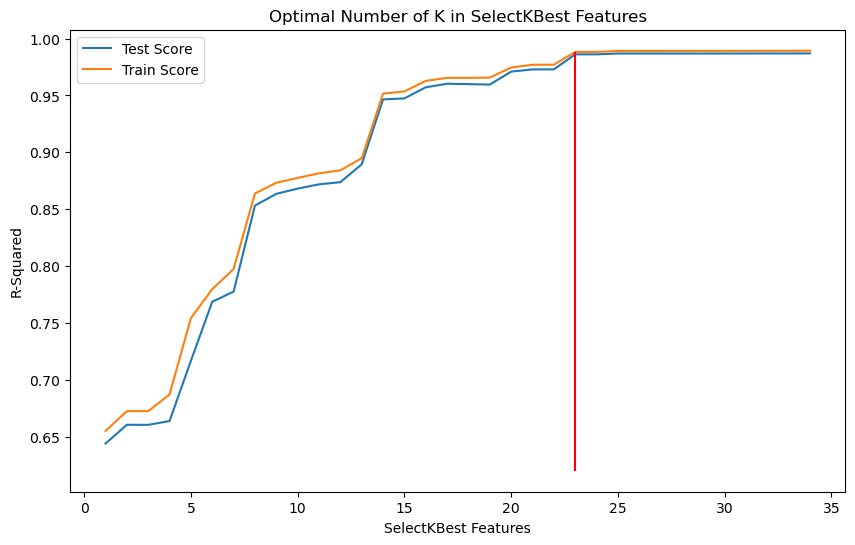

In [42]:
plt.figure(figsize=(10,6))

plt.plot(cv_results_regr["param_selector__k"], cv_results_regr["mean_test_score"])
plt.plot(cv_results_regr["param_selector__k"], cv_results_regr["mean_train_score"])
plt.vlines(x = 23, ymin = 0.62, ymax = cv_results_regr.loc[22, "mean_train_score"],
           colors = 'red',
           label = 'vline_multiple - full height')
plt.xlabel('SelectKBest Features')
plt.ylabel('R-Squared')
plt.title("Optimal Number of K in SelectKBest Features")
plt.legend(['Test Score', 'Train Score'], loc='upper left')
plt.show()

In [43]:
pipeline_gbr = Pipeline(
    [
     ('selector', fs),
     ('model', gbr)
    ]
)

search_gbr = GridSearchCV(
    estimator = pipeline_gbr,
    param_grid = {
        'selector__score_func': [f_regression],
        'selector__k':[i for i in range(1, 11)], 
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [4, 5, 6],
        'model__min_samples_split': [4, 5, 6]
        },
    n_jobs=-1,
    scoring="r2",
    cv=10,
    verbose=3,
    return_train_score=True
)

search_gbr.fit(X_train, y_train)

cv_results_gbr = pd.DataFrame(search_gbr.cv_results_)
cv_results_gbr

Fitting 10 folds for each of 270 candidates, totalling 2700 fits
[CV 8/10] END selector__k=1, selector__score_func=<function f_regression at 0x117451000>;, score=(train=0.656, test=0.630) total time=   0.0s
[CV 8/10] END selector__k=3, selector__score_func=<function f_regression at 0x117451000>;, score=(train=0.675, test=0.634) total time=   0.0s
[CV 1/10] END selector__k=4, selector__score_func=<function f_regression at 0x117451000>;, score=(train=0.677, test=0.647) total time=   0.0s
[CV 5/10] END selector__k=4, selector__score_func=<function f_regression at 0x117451000>;, score=(train=0.675, test=0.673) total time=   0.0s
[CV 10/10] END selector__k=4, selector__score_func=<function f_regression at 0x117451000>;, score=(train=0.682, test=0.603) total time=   0.0s
[CV 1/10] END selector__k=6, selector__score_func=<function f_regression at 0x117451000>;, score=(train=0.774, test=0.824) total time=   0.0s
[CV 2/10] END selector__k=6, selector__score_func=<function f_regression at 0x1174

[CV 5/10] END selector__k=1, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.655, test=0.648) total time=   0.0s
[CV 9/10] END selector__k=2, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.671, test=0.679) total time=   0.0s
[CV 4/10] END selector__k=3, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.658, test=0.741) total time=   0.0s
[CV 9/10] END selector__k=3, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.671, test=0.679) total time=   0.0s
[CV 6/10] END selector__k=4, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.673, test=0.695) total time=   0.0s
[CV 9/10] END selector__k=5, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.779, test=0.780) total time=   0.0s
[CV 10/10] END selector__k=5, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.790, test=0.678) total time=   0.0s
[CV 5

[CV 1/10] END selector__k=1, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.655, test=0.646) total time=   0.0s
[CV 9/10] END selector__k=1, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.655, test=0.652) total time=   0.0s
[CV 10/10] END selector__k=1, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.660, test=0.600) total time=   0.0s
[CV 1/10] END selector__k=2, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.674, test=0.646) total time=   0.0s
[CV 2/10] END selector__k=2, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.676, test=0.636) total time=   0.0s
[CV 3/10] END selector__k=2, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.664, test=0.747) total time=   0.0s
[CV 4/10] END selector__k=2, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.658, test=0.741) total time=   0.0s
[CV 6

[CV 3/10] END selector__k=1, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.648, test=0.716) total time=   0.0s
[CV 1/10] END selector__k=3, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.674, test=0.646) total time=   0.0s
[CV 7/10] END selector__k=3, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.684, test=0.559) total time=   0.0s
[CV 5/10] END selector__k=5, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.781, test=0.761) total time=   0.0s
[CV 6/10] END selector__k=5, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.777, test=0.803) total time=   0.0s
[CV 7/10] END selector__k=6, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.779, test=0.772) total time=   0.0s
[CV 8/10] END selector__k=6, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.782, test=0.741) total time=   0.0s
[CV 9/

[CV 2/10] END selector__k=1, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.659, test=0.621) total time=   0.0s
[CV 4/10] END selector__k=4, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.779, test=0.755) total time=   0.0s
[CV 9/10] END selector__k=4, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.673, test=0.686) total time=   0.0s
[CV 5/10] END selector__k=6, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.781, test=0.761) total time=   0.0s
[CV 6/10] END selector__k=6, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.777, test=0.803) total time=   0.0s
[CV 7/10] END selector__k=7, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.779, test=0.773) total time=   0.0s
[CV 8/10] END selector__k=7, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.782, test=0.740) total time=   0.0s
[CV 1/

[CV 4/10] END selector__k=1, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.643, test=0.705) total time=   0.0s
[CV 3/10] END selector__k=6, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.777, test=0.800) total time=   0.0s
[CV 4/10] END selector__k=6, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.779, test=0.751) total time=   0.0s
[CV 1/10] END selector__k=7, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.774, test=0.824) total time=   0.0s
[CV 2/10] END selector__k=7, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.780, test=0.776) total time=   0.0s
[CV 9/10] END selector__k=13, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.892, test=0.857) total time=   0.0s
[CV 10/10] END selector__k=13, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.889, test=0.882) total time=   0.0s
[CV

[CV 6/10] END selector__k=1, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.653, test=0.670) total time=   0.0s
[CV 6/10] END selector__k=3, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.670, test=0.695) total time=   0.0s
[CV 3/10] END selector__k=4, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.667, test=0.752) total time=   0.0s
[CV 8/10] END selector__k=4, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.677, test=0.636) total time=   0.0s
[CV 7/10] END selector__k=5, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.700, test=0.552) total time=   0.0s
[CV 8/10] END selector__k=5, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.782, test=0.742) total time=   0.0s
[CV 9/10] END selector__k=6, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.779, test=0.780) total time=   0.0s
[CV 10

[CV 8/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=1, selector__score_func=<function f_regression at 0x117451000>;, score=(train=0.857, test=0.855) total time=   0.0s
[CV 3/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=2, selector__score_func=<function f_regression at 0x117451000>;, score=(train=0.857, test=0.853) total time=   0.0s
[CV 4/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=2, selector__score_func=<function f_regression at 0x117451000>;, score=(train=0.857, test=0.854) total time=   0.0s
[CV 5/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=2, selector__score_func=<function f_regression at 0x117451000>;, score=(train=0.857, test=0.863) total time=   0.0s
[CV 6/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=2, selector__score_func=<function f_regre

[CV 2/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=3, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.858, test=0.859) total time=   0.0s
[CV 3/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=3, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.858, test=0.855) total time=   0.1s
[CV 4/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=3, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.858, test=0.855) total time=   0.1s
[CV 7/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=4, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.857, test=0.842) total time=   0.1s
[CV 9/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=4, selector__score_func=<function f_regre

[CV 3/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=2, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.979, test=0.976) total time=   0.1s
[CV 4/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=3, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.979, test=0.979) total time=   0.1s
[CV 10/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=3, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.979, test=0.978) total time=   0.1s
[CV 8/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=4, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.979, test=0.981) total time=   0.1s
[CV 1/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=6, selector__score_func=<function f_regr

[CV 6/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=4, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.857, test=0.850) total time=   0.1s
[CV 5/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=5, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.857, test=0.862) total time=   0.1s
[CV 8/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=5, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.857, test=0.853) total time=   0.1s
[CV 4/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=6, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.857, test=0.854) total time=   0.1s
[CV 10/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=100, selector__k=6, selector__score_func=<function f_regr

[CV 9/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=2, selector__score_func=<function f_regression at 0x10c1c1000>;, score=(train=0.979, test=0.975) total time=   0.1s
[CV 6/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=3, selector__score_func=<function f_regression at 0x10c1c1000>;, score=(train=0.979, test=0.977) total time=   0.1s
[CV 4/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=4, selector__score_func=<function f_regression at 0x10c1c1000>;, score=(train=0.979, test=0.977) total time=   0.1s
[CV 9/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=5, selector__score_func=<function f_regression at 0x10c1c1000>;, score=(train=0.979, test=0.976) total time=   0.2s
[CV 10/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=5, selector__score_func=<function f_regr

[CV 4/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=7, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.979, test=0.977) total time=   0.2s
[CV 1/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=9, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.977, test=0.977) total time=   0.2s
[CV 2/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=9, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.977, test=0.981) total time=   0.4s
[CV 9/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=10, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.979, test=0.976) total time=   0.3s
[CV 10/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=10, selector__score_func=<function f_re

[CV 6/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=200, selector__k=9, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.978, test=0.963) total time=   0.3s
[CV 1/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=300, selector__k=1, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.996, test=0.995) total time=   0.1s
[CV 2/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=300, selector__k=1, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.996, test=0.995) total time=   0.1s
[CV 5/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=300, selector__k=1, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.996, test=0.995) total time=   0.1s
[CV 6/10] END model__max_depth=4, model__min_samples_split=5, model__n_estimators=300, selector__k=1, selector__score_func=<function f_regre

[CV 7/10] END model__max_depth=4, model__min_samples_split=6, model__n_estimators=200, selector__k=10, selector__score_func=<function f_regression at 0x117451000>;, score=(train=0.977, test=0.969) total time=   0.3s
[CV 8/10] END model__max_depth=4, model__min_samples_split=6, model__n_estimators=200, selector__k=10, selector__score_func=<function f_regression at 0x117451000>;, score=(train=0.977, test=0.982) total time=   0.3s
[CV 1/10] END model__max_depth=4, model__min_samples_split=6, model__n_estimators=300, selector__k=3, selector__score_func=<function f_regression at 0x117451000>;, score=(train=0.996, test=0.995) total time=   0.2s
[CV 2/10] END model__max_depth=4, model__min_samples_split=6, model__n_estimators=300, selector__k=3, selector__score_func=<function f_regression at 0x117451000>;, score=(train=0.996, test=0.995) total time=   0.2s
[CV 7/10] END model__max_depth=4, model__min_samples_split=6, model__n_estimators=300, selector__k=4, selector__score_func=<function f_reg

[CV 1/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=200, selector__k=3, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.981, test=0.979) total time=   0.1s
[CV 2/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=200, selector__k=3, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.981, test=0.979) total time=   0.1s
[CV 7/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=200, selector__k=4, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.981, test=0.979) total time=   0.2s
[CV 8/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=200, selector__k=4, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.981, test=0.982) total time=   0.2s
[CV 3/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=200, selector__k=6, selector__score_func=<function f_regre

[CV 7/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, selector__k=5, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.863, test=0.854) total time=   0.1s
[CV 8/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, selector__k=5, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.863, test=0.862) total time=   0.1s
[CV 7/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, selector__k=6, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.863, test=0.854) total time=   0.1s
[CV 8/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, selector__k=6, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.863, test=0.862) total time=   0.1s
[CV 5/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, selector__k=8, selector__score_func=<function f_regre

[CV 6/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=200, selector__k=5, selector__score_func=<function f_regression at 0x10c1c1000>;, score=(train=0.981, test=0.980) total time=   0.2s
[CV 1/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=200, selector__k=7, selector__score_func=<function f_regression at 0x10c1c1000>;, score=(train=0.981, test=0.979) total time=   0.2s
[CV 2/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=200, selector__k=7, selector__score_func=<function f_regression at 0x10c1c1000>;, score=(train=0.981, test=0.979) total time=   0.2s
[CV 7/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=200, selector__k=8, selector__score_func=<function f_regression at 0x10c1c1000>;, score=(train=0.980, test=0.977) total time=   0.3s
[CV 8/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=200, selector__k=8, selector__score_func=<function f_regre

[CV 8/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, selector__k=7, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.863, test=0.862) total time=   0.1s
[CV 3/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, selector__k=9, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.862, test=0.850) total time=   0.2s
[CV 4/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, selector__k=9, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.861, test=0.851) total time=   0.2s
[CV 9/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, selector__k=10, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.863, test=0.857) total time=   0.2s
[CV 10/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, selector__k=10, selector__score_func=<function f_re

[CV 2/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=300, selector__k=1, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.996, test=0.996) total time=   0.1s
[CV 7/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=300, selector__k=1, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.996, test=0.996) total time=   0.2s
[CV 8/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=300, selector__k=1, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.996, test=0.997) total time=   0.2s
[CV 9/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=300, selector__k=2, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.996, test=0.995) total time=   0.2s
[CV 10/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=300, selector__k=2, selector__score_func=<function f_regr

[CV 2/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=300, selector__k=7, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.997, test=0.996) total time=   0.5s
[CV 7/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=300, selector__k=8, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.997, test=0.994) total time=   0.6s
[CV 8/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=300, selector__k=8, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.997, test=0.997) total time=   0.5s
[CV 5/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=300, selector__k=10, selector__score_func=<function f_regression at 0x1167f5000>;, score=(train=0.997, test=0.995) total time=   0.6s
[CV 6/10] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=300, selector__k=10, selector__score_func=<function f_reg

[CV 6/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=100, selector__k=2, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.863, test=0.860) total time=   0.1s
[CV 10/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=100, selector__k=2, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.862, test=0.861) total time=   0.1s
[CV 4/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=100, selector__k=3, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.862, test=0.854) total time=   0.1s
[CV 10/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=100, selector__k=3, selector__score_func=<function f_regression at 0x113405000>;, score=(train=0.863, test=0.858) total time=   0.1s
[CV 8/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=100, selector__k=4, selector__score_func=<function f_reg

[CV 7/10] END model__max_depth=6, model__min_samples_split=4, model__n_estimators=100, selector__k=7, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.865, test=0.854) total time=   0.1s
[CV 8/10] END model__max_depth=6, model__min_samples_split=4, model__n_estimators=100, selector__k=7, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.865, test=0.862) total time=   0.1s
[CV 3/10] END model__max_depth=6, model__min_samples_split=4, model__n_estimators=100, selector__k=9, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.864, test=0.853) total time=   0.2s
[CV 4/10] END model__max_depth=6, model__min_samples_split=4, model__n_estimators=100, selector__k=9, selector__score_func=<function f_regression at 0x10c1e9000>;, score=(train=0.864, test=0.857) total time=   0.2s
[CV 9/10] END model__max_depth=6, model__min_samples_split=4, model__n_estimators=100, selector__k=10, selector__score_func=<function f_regr

[CV 2/10] END model__max_depth=5, model__min_samples_split=5, model__n_estimators=300, selector__k=9, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.997, test=0.996) total time=   0.6s
[CV 10/10] END model__max_depth=5, model__min_samples_split=5, model__n_estimators=300, selector__k=9, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.997, test=0.994) total time=   0.6s
[CV 8/10] END model__max_depth=5, model__min_samples_split=5, model__n_estimators=300, selector__k=10, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.997, test=0.997) total time=   0.6s
[CV 2/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=100, selector__k=4, selector__score_func=<function f_regression at 0x12314d000>;, score=(train=0.863, test=0.857) total time=   0.1s
[CV 10/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=100, selector__k=4, selector__score_func=<function f_re

[CV 6/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=100, selector__k=9, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.862, test=0.849) total time=   0.2s
[CV 1/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=200, selector__k=1, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.980, test=0.979) total time=   0.1s
[CV 2/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=200, selector__k=1, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.980, test=0.979) total time=   0.1s
[CV 9/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=200, selector__k=1, selector__score_func=<function f_regression at 0x126189000>;, score=(train=0.980, test=0.977) total time=   0.1s
[CV 10/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=200, selector__k=1, selector__score_func=<function f_regr

[CV 7/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=200, selector__k=3, selector__score_func=<function f_regression at 0x10c1c1000>;, score=(train=0.981, test=0.979) total time=   0.1s
[CV 8/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=200, selector__k=3, selector__score_func=<function f_regression at 0x10c1c1000>;, score=(train=0.981, test=0.982) total time=   0.1s
[CV 3/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=200, selector__k=5, selector__score_func=<function f_regression at 0x10c1c1000>;, score=(train=0.981, test=0.980) total time=   0.2s
[CV 4/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=200, selector__k=5, selector__score_func=<function f_regression at 0x10c1c1000>;, score=(train=0.981, test=0.979) total time=   0.2s
[CV 9/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=200, selector__k=6, selector__score_func=<function f_regre

[CV 3/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=300, selector__k=8, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.997, test=0.989) total time=   0.4s
[CV 4/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=300, selector__k=8, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.997, test=0.995) total time=   0.4s
[CV 9/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=300, selector__k=9, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.997, test=0.993) total time=   0.5s
[CV 10/10] END model__max_depth=5, model__min_samples_split=6, model__n_estimators=300, selector__k=9, selector__score_func=<function f_regression at 0x1139d9000>;, score=(train=0.997, test=0.994) total time=   0.5s
[CV 7/10] END model__max_depth=6, model__min_samples_split=4, model__n_estimators=100, selector__k=1, selector__score_func=<function f_regr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,param_selector__k,param_selector__score_func,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.038629,0.006211,0.001124,0.000488,4,4,100,1,<function f_regression at 0x135ec8160>,"{'model__max_depth': 4, 'model__min_samples_sp...",...,0.857415,0.857446,0.857240,0.857213,0.856992,0.856796,0.857696,0.857028,0.857219,0.000251
1,0.038497,0.004342,0.001652,0.000822,4,4,100,2,<function f_regression at 0x135ec8160>,"{'model__max_depth': 4, 'model__min_samples_sp...",...,0.857415,0.857446,0.857240,0.857213,0.856992,0.856796,0.857696,0.857028,0.857219,0.000251
2,0.050371,0.009635,0.000730,0.000025,4,4,100,3,<function f_regression at 0x135ec8160>,"{'model__max_depth': 4, 'model__min_samples_sp...",...,0.857627,0.857708,0.857549,0.857283,0.857280,0.857041,0.857938,0.857293,0.857458,0.000250
3,0.060102,0.003237,0.000860,0.000294,4,4,100,4,<function f_regression at 0x135ec8160>,"{'model__max_depth': 4, 'model__min_samples_sp...",...,0.857627,0.857484,0.857549,0.857283,0.857280,0.857041,0.857938,0.857293,0.857436,0.000236
4,0.073037,0.004735,0.001110,0.000466,4,4,100,5,<function f_regression at 0x135ec8160>,"{'model__max_depth': 4, 'model__min_samples_sp...",...,0.857499,0.857484,0.857371,0.857181,0.857280,0.856836,0.857824,0.857176,0.857352,0.000252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.353403,0.004202,0.002015,0.000574,6,6,300,6,<function f_regression at 0x135ec8160>,"{'model__max_depth': 6, 'model__min_samples_sp...",...,0.997374,0.997335,0.997345,0.997357,0.997349,0.997337,0.997355,0.997336,0.997346,0.000013
266,0.398551,0.017261,0.001888,0.000541,6,6,300,7,<function f_regression at 0x135ec8160>,"{'model__max_depth': 6, 'model__min_samples_sp...",...,0.997186,0.997335,0.997345,0.997357,0.997349,0.997337,0.997158,0.997336,0.997307,0.000068
267,0.470152,0.006421,0.001529,0.000551,6,6,300,8,<function f_regression at 0x135ec8160>,"{'model__max_depth': 6, 'model__min_samples_sp...",...,0.997186,0.997140,0.997167,0.997150,0.997205,0.997132,0.997158,0.997121,0.997155,0.000024
268,0.540366,0.005539,0.001877,0.000675,6,6,300,9,<function f_regression at 0x135ec8160>,"{'model__max_depth': 6, 'model__min_samples_sp...",...,0.997200,0.997187,0.997158,0.997163,0.997238,0.997180,0.997157,0.997180,0.997177,0.000025


In [44]:
print(search_gbr.best_params_)
print(search_gbr.best_score_)

{'model__max_depth': 6, 'model__min_samples_split': 5, 'model__n_estimators': 300, 'selector__k': 5, 'selector__score_func': <function f_regression at 0x135ec8160>}
0.99598999170778


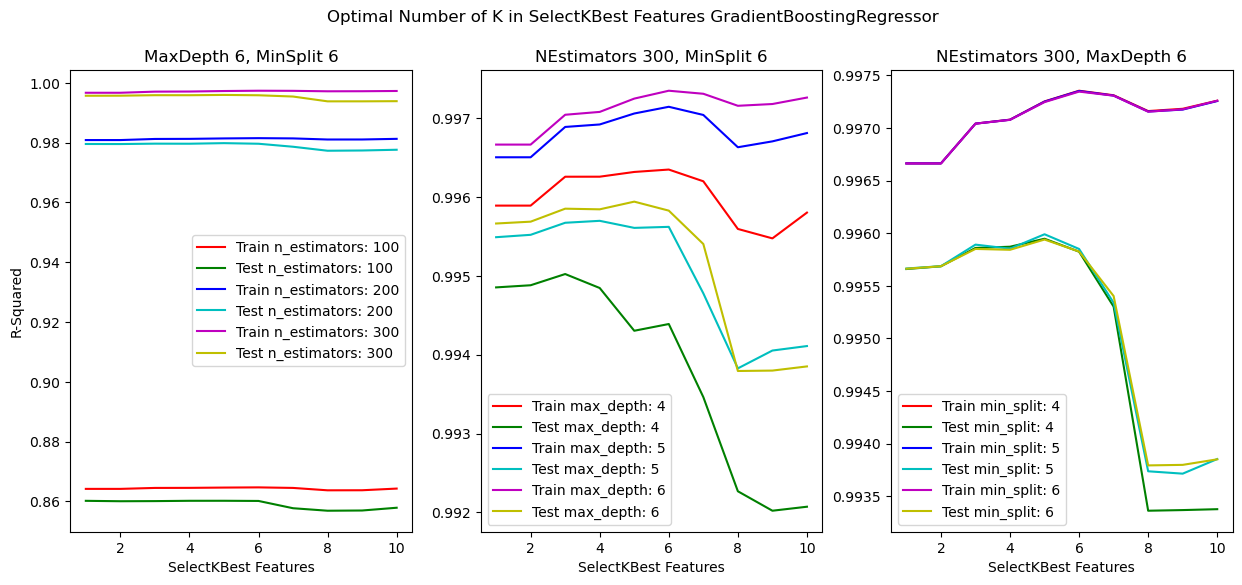

In [45]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Optimal Number of K in SelectKBest Features GradientBoostingRegressor')

plt_legends = []
color_count = 0
for i in [100, 200, 300]:
    for j in [6]:
        for k in [6]:
            ax1.plot(cv_results_gbr[
                (cv_results_gbr["param_model__n_estimators"] == i)
                & (cv_results_gbr["param_model__max_depth"] == j)
                & (cv_results_gbr["param_model__min_samples_split"] == k)
            ]["param_selector__k"], cv_results_gbr[
                (cv_results_gbr["param_model__n_estimators"] == i)
                & (cv_results_gbr["param_model__max_depth"] == j)
                & (cv_results_gbr["param_model__min_samples_split"]== k)
            ]["mean_train_score"], color=colors[color_count])
            color_count += 1
            plt_legends.append(f'Train n_estimators: {i}')

            ax1.plot(cv_results_gbr[
                (cv_results_gbr["param_model__n_estimators"] == i)
                & (cv_results_gbr["param_model__max_depth"] == j)
                & (cv_results_gbr["param_model__min_samples_split"] == k)
            ]["param_selector__k"], cv_results_gbr[
                (cv_results_gbr["param_model__n_estimators"] == i)
                & (cv_results_gbr["param_model__max_depth"] == j)
                & (cv_results_gbr["param_model__min_samples_split"]== k)
            ]["mean_test_score"], color=colors[color_count])
            color_count += 1
            plt_legends.append(f'Test n_estimators: {i}')

ax1.set_xlabel('SelectKBest Features')
ax1.set_ylabel('R-Squared')
ax1.set_title("MaxDepth 6, MinSplit 6")
ax1.legend(plt_legends)

color_count = 0
plt_legends = []
for i in [300]:
    for j in [4, 5, 6]:
        for k in [6]:
            ax2.plot(cv_results_gbr[
                (cv_results_gbr["param_model__n_estimators"] == i)
                & (cv_results_gbr["param_model__max_depth"] == j)
                & (cv_results_gbr["param_model__min_samples_split"] == k)
            ]["param_selector__k"], cv_results_gbr[
                (cv_results_gbr["param_model__n_estimators"] == i)
                & (cv_results_gbr["param_model__max_depth"] == j)
                & (cv_results_gbr["param_model__min_samples_split"]== k)
            ]["mean_train_score"], color=colors[color_count])
            color_count += 1
            plt_legends.append(f'Train max_depth: {j}')

            ax2.plot(cv_results_gbr[
                (cv_results_gbr["param_model__n_estimators"] == i)
                & (cv_results_gbr["param_model__max_depth"] == j)
                & (cv_results_gbr["param_model__min_samples_split"] == k)
            ]["param_selector__k"], cv_results_gbr[
                (cv_results_gbr["param_model__n_estimators"] == i)
                & (cv_results_gbr["param_model__max_depth"] == j)
                & (cv_results_gbr["param_model__min_samples_split"]== k)
            ]["mean_test_score"], color=colors[color_count])
            color_count += 1
            plt_legends.append(f'Test max_depth: {j}')

ax2.set_xlabel('SelectKBest Features')
ax2.set_title("NEstimators 300, MinSplit 6")
ax2.legend(plt_legends)

color_count = 0
plt_legends = []
for i in [300]:
    for j in [6]:
        for k in [4, 5, 6]:
            ax3.plot(cv_results_gbr[
                (cv_results_gbr["param_model__n_estimators"] == i)
                & (cv_results_gbr["param_model__max_depth"] == j)
                & (cv_results_gbr["param_model__min_samples_split"] == k)
            ]["param_selector__k"], cv_results_gbr[
                (cv_results_gbr["param_model__n_estimators"] == i)
                & (cv_results_gbr["param_model__max_depth"] == j)
                & (cv_results_gbr["param_model__min_samples_split"]== k)
            ]["mean_train_score"], color=colors[color_count])
            color_count += 1
            plt_legends.append(f'Train min_split: {k}')

            ax3.plot(cv_results_gbr[
                (cv_results_gbr["param_model__n_estimators"] == i)
                & (cv_results_gbr["param_model__max_depth"] == j)
                & (cv_results_gbr["param_model__min_samples_split"] == k)
            ]["param_selector__k"], cv_results_gbr[
                (cv_results_gbr["param_model__n_estimators"] == i)
                & (cv_results_gbr["param_model__max_depth"] == j)
                & (cv_results_gbr["param_model__min_samples_split"]== k)
            ]["mean_test_score"], color=colors[color_count])
            color_count += 1
            plt_legends.append(f'Test min_split: {k}')

ax3.set_xlabel('SelectKBest Features')
ax3.set_title("NEstimators 300, MaxDepth 6")
ax3.legend(plt_legends)
plt.show()

In [66]:
fs = SelectKBest(score_func=f_regression, k=23)
fs.fit(X_train, y_train)

cols_idxs = fs.get_support(indices=True)
reduc_X_train = X_train.iloc[:, cols_idxs]
reduc_X_test = X_test.iloc[:, cols_idxs]

scaled_reduc_X_train = scaled_X_train.iloc[:, cols_idxs]
scaled_reduc_X_test = scaled_X_test.iloc[:, cols_idxs]

print(reduc_X_train.columns.values)

['cases_unvax' 'cases_pvax' 'cases_fvax' 'cumul_full' 'cumul_booster'
 'cumul_booster2' 'cumul_partial_adol' 'cumul_full_adol'
 'cumul_booster_adol' 'cumul_booster2_adol' 'cumul_partial_child'
 'cumul_full_child' 'cumul_booster_child' 'cumul_booster2_child' 'pfizer1'
 'pfizer2' 'pfizer4' 'sinovac1' 'sinovac2' 'astra1' 'astra2' 'sinopharm1'
 'cansino']


In [101]:
reduced_columns = set(reduc_X_train.columns.values)
indices = [i for i, item in enumerate(columns_of_interests) if item in reduced_columns]
print(indices)

[0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 24, 25, 28, 32]


In [102]:
regr = LinearRegression()
raw_output = find_scores(regr, X_train, X_test, False)
scaled_output = find_scores(regr, scaled_X_train, scaled_X_test, False)
raw_reduc_output = find_scores(regr, reduc_X_train, reduc_X_test, False)
scaled_reduc_output = find_scores(regr, scaled_reduc_X_train, scaled_reduc_X_test, False)

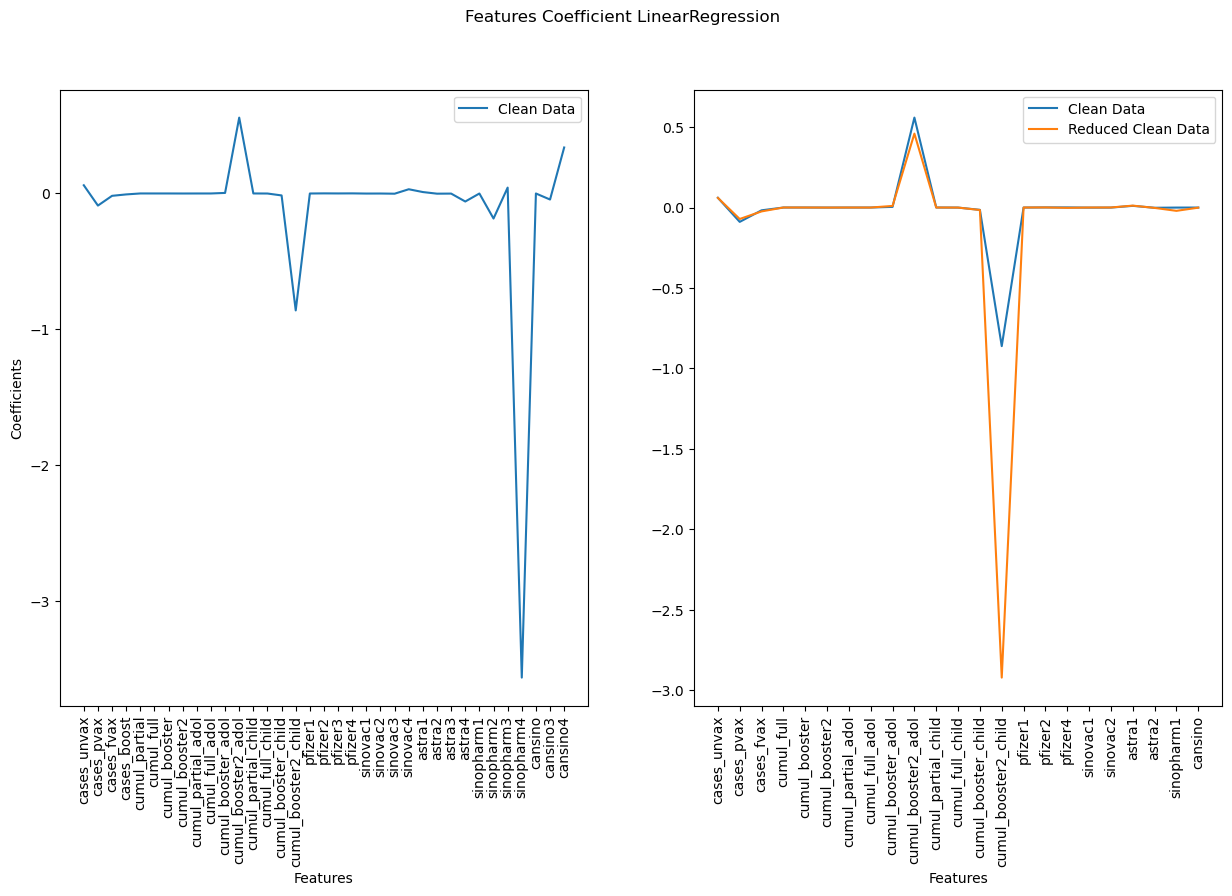

In [105]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Features Coefficient LinearRegression')

ax1.plot(columns_of_interests, raw_output[key_coef])

ax1.set_xlabel('Features')
ax1.set_ylabel('Coefficients')
ax1.tick_params(axis='x', labelrotation = 90)
ax1.legend(['Clean Data'])

matched_raw_reduc_coef = [raw_output[key_coef][i] for i in range(len(raw_output[key_coef])) if i in indices]

ax2.plot(reduc_X_train.columns.values, matched_raw_reduc_coef)
ax2.plot(reduc_X_train.columns.values, raw_reduc_output[key_coef])

ax2.set_xlabel('Features')
ax2.tick_params(axis='x', labelrotation = 90)
ax2.legend(['Clean Data', 'Reduced Clean Data'])

plt.show()

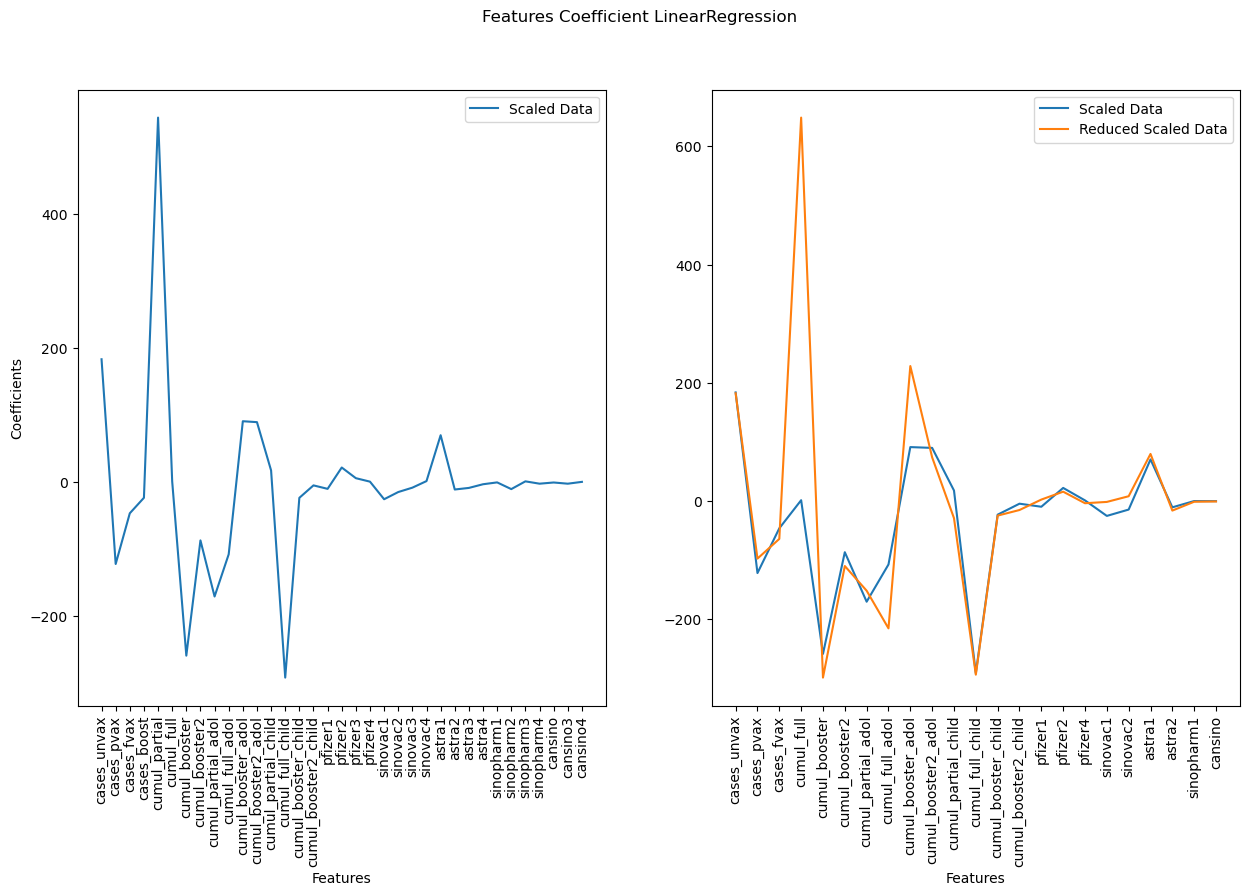

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Features Coefficient LinearRegression')

ax1.plot(columns_of_interests, scaled_output[key_coef])

ax1.set_xlabel('Features')
ax1.set_ylabel('Coefficients')
ax1.tick_params(axis='x', labelrotation = 90)
ax1.legend(['Scaled Data'])

matched_scaled_reduc_coef = [scaled_output[key_coef][i] for i in range(len(scaled_output[key_coef])) if i in indices]

ax2.plot(reduc_X_train.columns.values, matched_scaled_reduc_coef)
ax2.plot(reduc_X_train.columns.values, scaled_reduc_output[key_coef])

ax2.set_xlabel('Features')
ax2.tick_params(axis='x', labelrotation = 90)
ax2.legend(['Scaled Data', 'Reduced Scaled Data'])

plt.show()

In [112]:
intercepts = {'Intercept': [raw_output[key_intercept], raw_reduc_output[key_intercept], scaled_output[key_intercept], scaled_reduc_output[key_intercept]]}
intercept_df = pd.DataFrame.from_dict(intercepts)
intercept_df.index = ['Clean Data', 'Clean Data Feature Reduced', 'Scaled Data', 'Scaled Data Feature Reduced']
intercept_df

,Intercept
Clean Data,453.919365
Clean Data Feature Reduced,463.150448
Scaled Data,755.136066
Scaled Data Feature Reduced,755.136066


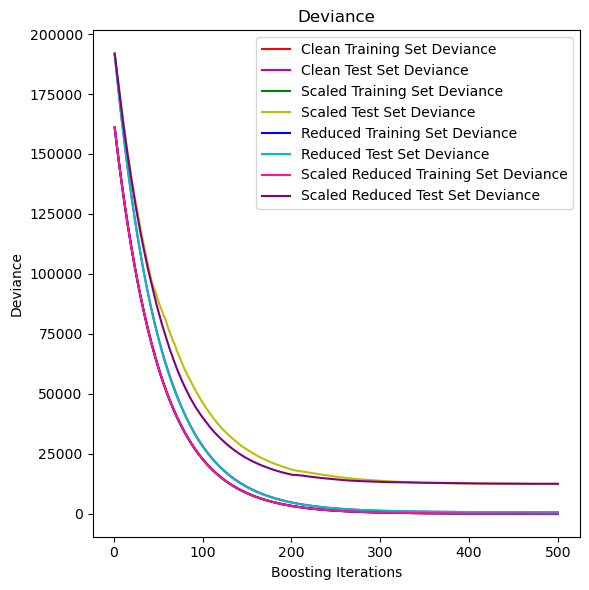

In [125]:
gbr_dev_raw = GradientBoostingRegressor(n_estimators=500, max_depth=4, min_samples_split=5, learning_rate=0.01, loss='squared_error', random_state=999)
gbr_dev_raw.fit(X_train, y_train)

gbr_dev_scaled = GradientBoostingRegressor(n_estimators=500, max_depth=4, min_samples_split=5, learning_rate=0.01, loss='squared_error', random_state=999)
gbr_dev_scaled.fit(scaled_X_train, y_train)

gbr_dev_reduc = GradientBoostingRegressor(n_estimators=500, max_depth=4, min_samples_split=5, learning_rate=0.01, loss='squared_error', random_state=999)
gbr_dev_reduc.fit(reduc_X_train, y_train)

gbr_dev_scaled_reduc = GradientBoostingRegressor(n_estimators=500, max_depth=4, min_samples_split=5, learning_rate=0.01, loss='squared_error', random_state=999)
gbr_dev_scaled_reduc.fit(scaled_reduc_X_train, y_train)

test_score_raw = np.zeros((500,), dtype=np.float64)
for i, y_pred in enumerate(gbr_dev_raw.staged_predict(X_test)):
    test_score_raw[i] = mean_squared_error(y_test, y_pred)
    
test_score_scaled = np.zeros((500,), dtype=np.float64)
for i, y_pred in enumerate(gbr_dev_scaled.staged_predict(scaled_X_test)):
    test_score_scaled[i] = mean_squared_error(y_test, y_pred)
    
test_score_reduc = np.zeros((500,), dtype=np.float64)
for i, y_pred in enumerate(gbr_dev_reduc.staged_predict(reduc_X_test)):
    test_score_reduc[i] = mean_squared_error(y_test, y_pred)
    
test_score_scaled_reduc = np.zeros((500,), dtype=np.float64)
for i, y_pred in enumerate(gbr_dev_scaled_reduc.staged_predict(scaled_reduc_X_test)):
    test_score_scaled_reduc[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(500) + 1,
    gbr_dev_raw.train_score_,
    "r-",
    label="Clean Training Set Deviance",
)
plt.plot(
    np.arange(500) + 1, test_score_raw, "m-", label="Clean Test Set Deviance"
)

plt.plot(
    np.arange(500) + 1,
    gbr_dev_scaled.train_score_,
    "g-",
    label="Scaled Training Set Deviance",
)
plt.plot(
    np.arange(500) + 1, test_score_scaled, "y-", label="Scaled Test Set Deviance"
)

plt.plot(
    np.arange(500) + 1,
    gbr_dev_reduc.train_score_,
    "b-",
    label="Reduced Training Set Deviance",
)
plt.plot(
    np.arange(500) + 1, test_score_reduc, "c-", label="Reduced Test Set Deviance"
)

plt.plot(
    np.arange(500) + 1,
    gbr_dev_scaled_reduc.train_score_,
    color="deeppink",
    label="Scaled Reduced Training Set Deviance",
)
plt.plot(
    np.arange(500) + 1, test_score_scaled_reduc, color="purple", label="Scaled Reduced Test Set Deviance"
)

plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

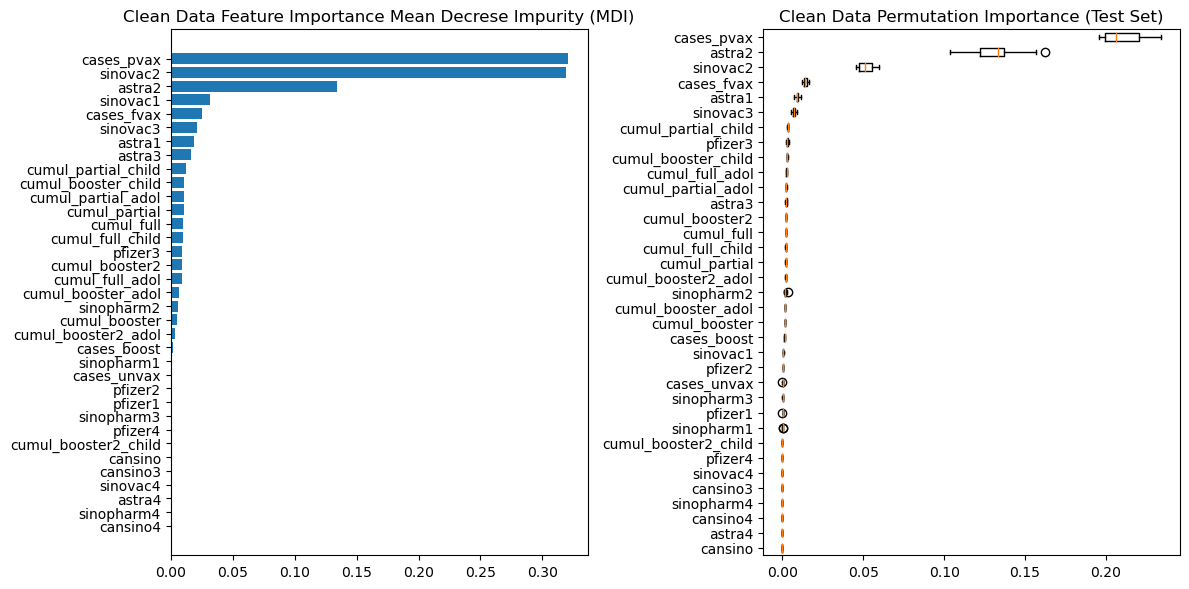

In [136]:
feature_importance = gbr_dev_raw.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns.values)[sorted_idx])
plt.title("Clean Feature Importance Mean Decraese Impurity (MDI)")

result = permutation_importance(
    gbr_dev_raw, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns.values)[sorted_idx],
)
plt.title("Clean Data Permutation Importance (Test Set)")
fig.tight_layout()
plt.show()

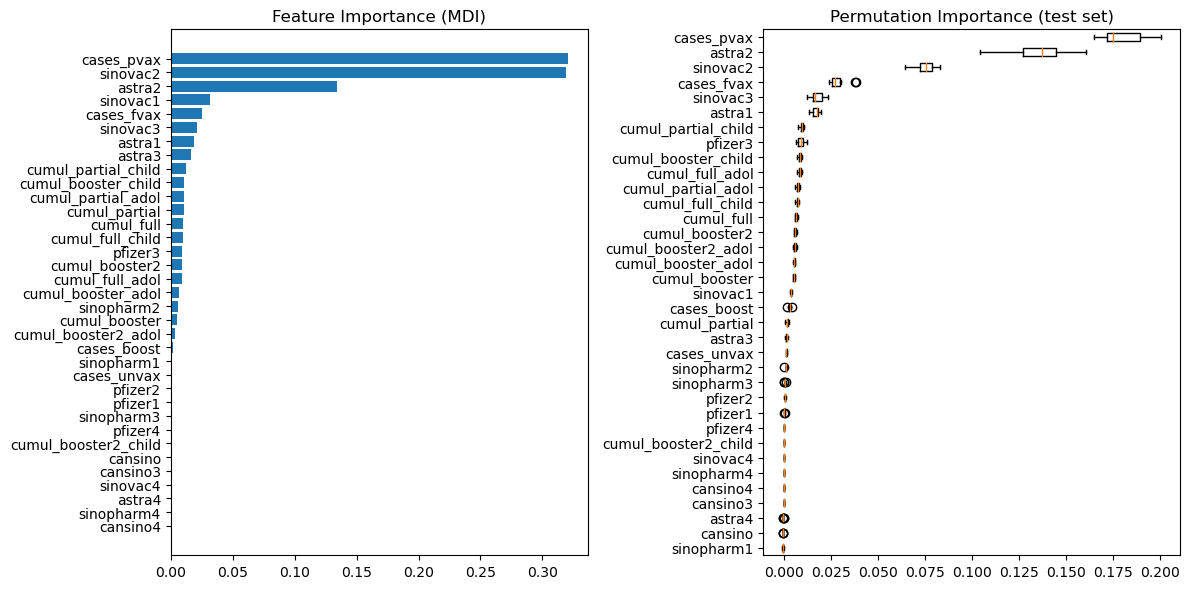

In [135]:
feature_importance = gbr_dev_scaled.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(scaled_X_train.columns.values)[sorted_idx])
plt.title("Scaled Data Feature Importance (MDI)")

result = permutation_importance(
    gbr_dev_scaled, scaled_X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(scaled_X_train.columns.values)[sorted_idx],
)
plt.title("Scaled Data Permutation Importance (Test Set)")
fig.tight_layout()
plt.show()

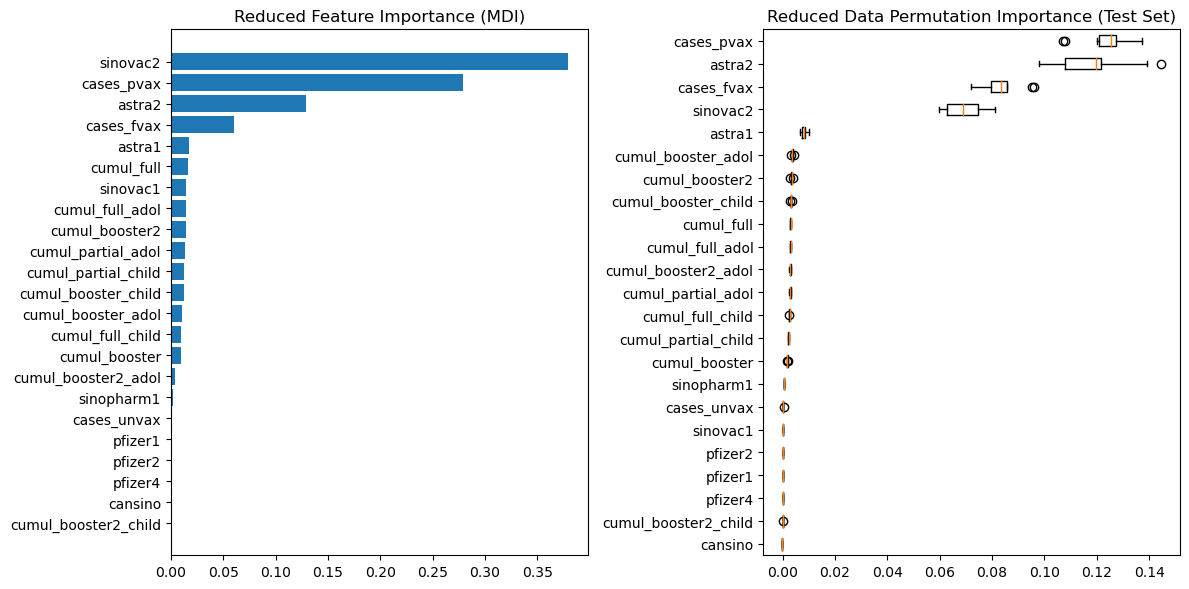

In [138]:
feature_importance = gbr_dev_reduc.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(reduc_X_train.columns.values)[sorted_idx])
plt.title("Reduced Data Feature Importance (MDI)")

result = permutation_importance(
    gbr_dev_reduc, reduc_X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(reduc_X_train.columns.values)[sorted_idx],
)
plt.title("Reduced Data Permutation Importance (Test Set)")
fig.tight_layout()
plt.show()

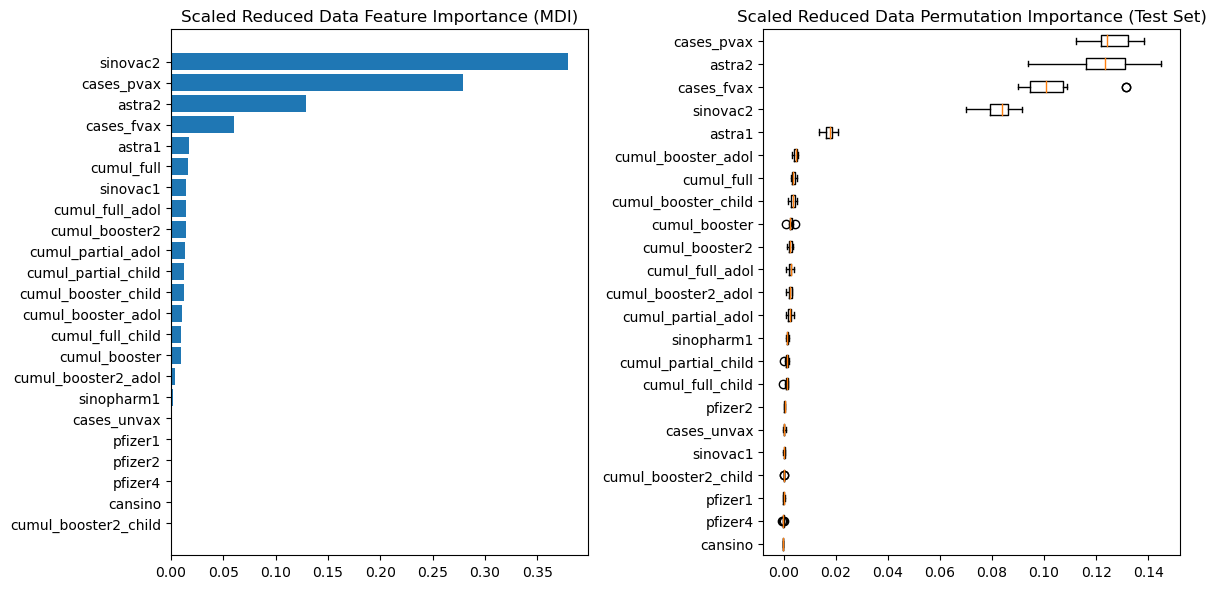

In [139]:
feature_importance = gbr_dev_scaled_reduc.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(scaled_reduc_X_train.columns.values)[sorted_idx])
plt.title("Scaled Reduced Data Feature Importance (MDI)")

result = permutation_importance(
    gbr_dev_scaled_reduc, scaled_reduc_X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(scaled_reduc_X_train.columns.values)[sorted_idx],
)
plt.title("Scaled Reduced Data Permutation Importance (Test Set)")
fig.tight_layout()
plt.show()